In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('loan_data.csv', delimiter=',',low_memory = False)

In [3]:
df.head() 

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0         Jan-1985           735.0            739.0             1.0   
1         Apr-1999           740.0            744.0             5.0   
2         Nov-2001           735.0            739.0             2.0   
3         Feb-1996           690.0            694.0             1.0   
4         Jan-1996           695.0            699.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0      83.7%        9.0                   f        0.0   
1     1687.0       9.4%        4.0                   f        0.0   
2     2956.0      98.5%       10.0                   f        0.0   
3     5598.0        21%       37.0                   f        0.0   
4    27783.0      53.9%       38.0                   f        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5863.1

In [4]:
df.describe(include='all').T

count unique       top freq          mean  \
id                       42536  42536   1077501    1           NaN   
member_id                  0.0    NaN       NaN  NaN           NaN   
loan_amnt              42535.0    NaN       NaN  NaN  11089.722581   
funded_amnt            42535.0    NaN       NaN  NaN  10821.585753   
funded_amnt_inv        42535.0    NaN       NaN  NaN  10139.938785   
...                        ...    ...       ...  ...           ...   
settlement_status          160      3  COMPLETE  142           NaN   
settlement_date            160     61  Sep-2013    8           NaN   
settlement_amount        160.0    NaN       NaN  NaN   4272.137875   
settlement_percentage    160.0    NaN       NaN  NaN     49.905875   
settlement_term          160.0    NaN       NaN  NaN           1.2   

                               std     min      25%      50%      75%      max  
id                             NaN     NaN      NaN      NaN      NaN      NaN  
member_id                      NaN     NaN      NaN      NaN      NaN      NaN  
loan_amnt              7410.938391   500.0   5200.0   9700.0  15000.0  35000.0  
funded_amnt            7146.914675   500.0   5000.0   9600.0  15000.0  35000.0  
funded_amnt_inv        7131.598014     0.0   4950.0   8500.0  14000.0  35000.0  
...                            ...     ...      ...      ...      ...      ...  
settlement_status              NaN     NaN      NaN      NaN      NaN      NaN  
settlement_date                NaN     NaN      NaN      NaN      NaN      NaN  
settlement_amount      3119.373774  193.29  1842.75  3499.35   5701.1  14798.2  
settlement_percentage     15.56369   10.69     40.0    49.97  60.6525    92.74  
settlement_term           4.085255     0.0      0.0      0.0      0.0     24.0  

[151 rows x 11 columns]

# 1. Data Processing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               42535 non-null  float64
 1   funded_amnt             42535 non-null  float64
 2   term                    42535 non-null  object 
 3   int_rate                42535 non-null  object 
 4   installment             42535 non-null  float64
 5   grade                   42535 non-null  object 
 6   sub_grade               42535 non-null  object 
 7   emp_title               39909 non-null  object 
 8   emp_length              41423 non-null  object 
 9   home_ownership          42535 non-null  object 
 10  annual_inc              42531 non-null  float64
 11  verification_status     42535 non-null  object 
 12  issue_d                 42535 non-null  object 
 13  loan_status             42535 non-null  object 
 14  pymnt_plan              42535 non-null

In [6]:
#usunięcie kolumn bez wartości
df.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

In [7]:
#usunięcie kolumn z danymi nieistonymi dla rozwiązania zadania. Wartość funded_amnt-inv odzwierciedla udział pieniędzy
#inwestorów w całkowitej kwocie udzielonej pożyczki i nie ma wpływu na czynniki istotne dla spłaty zoobowiązania.
df.drop(columns=['id', 'url', 'funded_amnt_inv', 'zip_code' ], axis=1,inplace=True)

In [8]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'p

In [9]:
#usunięcie kolumn z danymi przyszłymi- na podstawie analizy opisu zawartości kolumn. 
df.drop(columns=['out_prncp', 
'out_prncp_inv', 
'total_pymnt',
'total_pymnt_inv', 
'total_rec_prncp',
 'total_rec_int',
'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
'last_credit_pull_d',
'last_fico_range_high',
 'last_fico_range_low',
 'settlement_percentage',
'debt_settlement_flag',
'debt_settlement_flag_date',
'collections_12_mths_ex_med', 
'chargeoff_within_12_mths',
'inq_last_6mths'                
], axis=1, inplace=True)   

In [10]:
df.describe(include='all').T

count unique                 top   freq  \
loan_amnt               42535.0    NaN                 NaN    NaN   
funded_amnt             42535.0    NaN                 NaN    NaN   
term                      42535      2           36 months  31534   
int_rate                  42535    394              10.99%    970   
installment             42535.0    NaN                 NaN    NaN   
grade                     42535      7                   B  12389   
sub_grade                 42535     35                  B3   2997   
emp_title                 39909  30658             US Army    139   
emp_length                41423     11           10+ years   9369   
home_ownership            42535      5                RENT  20181   
annual_inc              42531.0    NaN                 NaN    NaN   
verification_status       42535      3        Not Verified  18758   
issue_d                   42535     55            Dec-2011   2267   
loan_status               42535      4          Fully Paid  34116   
pymnt_plan                42535      1                   n  42535   
desc                      29242  28963                        225   
purpose                   42535     14  debt_consolidation  19776   
title                     42522  21264  Debt Consolidation   2259   
addr_state                42535     50                  CA   7429   
dti                     42535.0    NaN                 NaN    NaN   
delinq_2yrs             42506.0    NaN                 NaN    NaN   
earliest_cr_line          42506    530            Oct-1999    393   
fico_range_low          42535.0    NaN                 NaN    NaN   
fico_range_high         42535.0    NaN                 NaN    NaN   
mths_since_last_delinq  15609.0    NaN                 NaN    NaN   
mths_since_last_record   3651.0    NaN                 NaN    NaN   
open_acc                42506.0    NaN                 NaN    NaN   
pub_rec                 42506.0    NaN                 NaN    NaN   
revol_bal               42535.0    NaN                 NaN    NaN   
revol_util                42445   1119                  0%   1070   
total_acc               42506.0    NaN                 NaN    NaN   
initial_list_status       42535      1                   f  42535   
policy_code             42535.0    NaN                 NaN    NaN   
application_type          42535      1          Individual  42535   
acc_now_delinq          42506.0    NaN                 NaN    NaN   
delinq_amnt             42506.0    NaN                 NaN    NaN   
pub_rec_bankruptcies    41170.0    NaN                 NaN    NaN   
tax_liens               42430.0    NaN                 NaN    NaN   
hardship_flag             42535      1                   N  42535   
disbursement_method       42535      1                Cash  42535   
settlement_status           160      3            COMPLETE    142   
settlement_date             160     61            Sep-2013      8   
settlement_amount         160.0    NaN                 NaN    NaN   
settlement_term           160.0    NaN                 NaN    NaN   

                                mean           std     min      25%      50%  \
loan_amnt               11089.722581   7410.938391   500.0   5200.0   9700.0   
funded_amnt             10821.585753   7146.914675   500.0   5000.0   9600.0   
term                             NaN           NaN     NaN      NaN      NaN   
int_rate                         NaN           NaN     NaN      NaN      NaN   
installment               322.623063    208.927216   15.67   165.52   277.69   
grade                            NaN           NaN     NaN      NaN      NaN   
sub_grade                        NaN           NaN     NaN      NaN      NaN   
emp_title                        NaN           NaN     NaN      NaN      NaN   
emp_length                       NaN           NaN     NaN      NaN      NaN   
home_ownership                   NaN           NaN     NaN      NaN      NaN   
annual_inc               69136.55642  64

In [11]:
df.isna().sum()

loan_amnt                     1
funded_amnt                   1
term                          1
int_rate                      1
installment                   1
grade                         1
sub_grade                     1
emp_title                  2627
emp_length                 1113
home_ownership                1
annual_inc                    5
verification_status           1
issue_d                       1
loan_status                   1
pymnt_plan                    1
desc                      13294
purpose                       1
title                        14
addr_state                    1
dti                           1
delinq_2yrs                  30
earliest_cr_line             30
fico_range_low                1
fico_range_high               1
mths_since_last_delinq    26927
mths_since_last_record    38885
open_acc                     30
pub_rec                      30
revol_bal                     1
revol_util                   91
total_acc                    30
initial_

W wyniku analizy tabel ze statystykami oraz sumą pustych wartości dla poszczególnych kolumn wiadomo że dane zawierają kolumny z tylko jedną wartością, które są nieprzydatne do budiwy modelu predykcyjnego. Widac również kolumny, w ktorych brakuje przynajmniej 10% wartości, czyli 4253 lub więcej wartości. Ponadto w kazdej kolumnie zaobserwowano przynajmniej 1 brakująca wartość, co może wskazywac na pusty wiersz.    

In [14]:
#df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record','settlement_status', 'settlement_date','settlement_amount', 'settlement_term', 'desc'],inplace=True)

In [15]:
df.shape

(42536, 44)

In [16]:
#usunięcie kolumn, w ktorych brakuje 10% lub więcej wartości
for i in df:
    if df[i].isnull().sum()/(df.shape[0])>=0.1:
        df.drop(i,axis =1, inplace=True)
        print('column droped: ', i)
    else:
        print(df.shape)
print(df.shape)

(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
(42536, 44)
column droped:  desc
(42536, 43)
(42536, 43)
(42536, 43)
(42536, 43)
(42536, 43)
(42536, 43)
(42536, 43)
(42536, 43)
column droped:  mths_since_last_delinq
column droped:  mths_since_last_record
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
(42536, 41)
column droped:  settlement_status
column droped:  settlement_date
column droped:  settlement_amount
column droped:  settlement_term
(42536, 37)


In [17]:
#usunięcie kolumn zawierających tylko jedną wartość
unique = df.nunique()
unique = unique[unique.values == 1]
df.drop(labels = list(unique.index), axis =1, inplace=True)

In [18]:
df.shape

(42536, 31)

In [19]:
#wyszukanie indeksu dla pustego wiersza i usunięcie go
nan_val = df[df['loan_amnt'].isna()]
nan_val= nan_val.index[0]
if len([nan_val])>0:
    df.drop(labels=nan_val, axis=0, inplace=True)
else:
    print('No empty rows')

In [20]:
df.shape

(42535, 31)

## 1. emp_title: Grupowanie i uzupełnianie brakujących wartości
Grupowanie po zatrudnieniu przeprowadzono według klucza:
1. osoby zatrudnione w miejscach związanych z ze służbą cywilną- rządowe departamenty, urzędy stanowe, poczta -Government
2. osoby zatrudnione w siłach zbrojnych - Armed Forces
3. osoby samozatrudnione- ze względu na wysokość udzielanych pożyczek (do 35000$) do grupy mogły trafić osoby, które wzięły pożyczkę na rozwój własnej działalności - Self Employed
4. osoby zatrudnione w innych miejscach, czyli głównie etatowi pracownicy firm - Other
5. osoby, które nie wskazały miejsca zatrudnienia. -Missing. Możliwe że w tej grupie znajdują się bezrobotni i studenci

Do weryfikacji na dalszych etapach pracy: czy połączyć Self Employed, Missing i Other? 

In [21]:
dd=df.groupby('emp_title').loan_amnt.count()
dd=dd.sort_values(ascending=False)
print(dd[0:10])
dd.shape

emp_title
US Army              139
Bank of America      115
IBM                   72
Kaiser Permanente     61
AT&T                  61
UPS                   58
Wells Fargo           57
USAF                  56
US Air Force          55
Self Employed         49
Name: loan_amnt, dtype: int64


(30658,)

In [22]:
df['emp_title'].fillna('Missing', inplace=True)

In [23]:
df.loc[df['emp_title'].str.contains('self', case=False), 'emp_title']='Self Employed'

In [24]:
df.loc[df['emp_title'].str.contains('army|force|navy|marine|usaf|guard', case=False), 'emp_title']='Armed Forces'

In [25]:
df.loc[df.emp_title.str.contains('postal|usps|govern|department|state of|dept', case=False), 'emp_title']='Government'

In [26]:
df.loc[(df.emp_title!='Armed Forces')
       & (df.emp_title!='Government')
       & (df.emp_title!='Self Employed')
       & (df.emp_title!='Missing'), 'emp_title']='Other'

## 2. title i purpose: Grupowanie i uzupełnianie brakujących wartości
Kolumny title i purpose opisują cel pożyczki. Title usunięto ponieważ opisy są bardzo zróżnicowane-wartości unikalne stanowiły połowę wszystkich wartości. 
Wartości w kolumnie puropse pogrupowano według klucza:
1. Pożyczki na spłatę kart kredytowych i konsolidacyjne - Consolidation
2. Pożyczki związane z remontem domu, przeprowadzką - Home
3. Pożyczki na wakcje, leczenie, edukację - Personal
4. Small_business
5. Car
6. Inne pożyczki - Other

Do weryfikacji na dalszych etapach pracy: czy pozosatwić Car i Small_business jako osobne grupy?

In [27]:
df.title.describe()

count                  42522
unique                 21264
top       Debt Consolidation
freq                    2259
Name: title, dtype: object

In [28]:
df.purpose.describe()

count                  42535
unique                    14
top       debt_consolidation
freq                   19776
Name: purpose, dtype: object

In [29]:
ddd=df.groupby('title').loan_amnt.count()
ddd=ddd.sort_values(ascending=False)
print(ddd[0:20])

title
Debt Consolidation           2259
Debt Consolidation Loan      1760
Personal Loan                 708
Consolidation                 547
debt consolidation            532
Home Improvement              373
Credit Card Consolidation     370
Debt consolidation            347
Small Business Loan           333
Personal                      330
Credit Card Loan              323
personal loan                 266
Consolidation Loan            264
Home Improvement Loan         255
personal                      247
Loan                          218
consolidation                 217
Wedding Loan                  217
Car Loan                      206
Other Loan                    192
Name: loan_amnt, dtype: int64


In [30]:
ddd=df.groupby('purpose').loan_amnt.count()
ddd=ddd.sort_values(ascending=False)
print(ddd)

purpose
debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: loan_amnt, dtype: int64


In [31]:
df.drop(columns=['title'],inplace=True)

In [32]:
df.loc[df['purpose'].str.contains('home|house|moving', case=False), 'purpose']='Home'

In [33]:
df.loc[df['purpose'].str.contains('consolidation|card', case=False), 'purpose']='Consolidation'

In [34]:
df.loc[df['purpose'].str.contains('wedding|educational|vacation|medical', case=False), 'purpose']='Personal'

In [35]:
df.loc[df['purpose'].str.contains('other|energy|major', case=False), 'purpose']='Other'

## 3 term
zmiana typu kolumny na numeryczny

<AxesSubplot:>

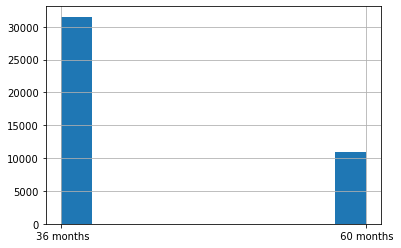

In [36]:
df.term.hist()

In [37]:
df['term']=df.term.str.replace(' months', '')

In [38]:
df['term'] = pd.to_numeric(df['term'])

## 4 emp_length
typ kolulmny zmieniono na numeryczny. Brakujące wartości uzupełniono występującą najszęsciej : 10

<AxesSubplot:>

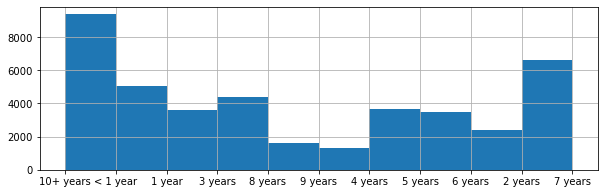

In [39]:
df.emp_length.hist(figsize=[10,3])

In [40]:
df['emp_length']=df.emp_length.str.replace('+', '')

C:\Users\T470\AppData\Local\Temp/ipykernel_18380/1425028902.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length']=df.emp_length.str.replace('+', '')


In [41]:
df['emp_length']=df.emp_length.str.replace(' years', '')
df['emp_length']=df.emp_length.str.replace('< 1 year', '0')
df['emp_length']=df.emp_length.str.replace('1 year', '1')

In [42]:
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [43]:
df['emp_length'].fillna(10, inplace=True)

## 5 delinq_2yrs
uzupełninie brakujących wartości za pomocą 0 - najczęśćiej się pojawia

In [44]:
del2=df.groupby('delinq_2yrs').loan_amnt.count()
del2

delinq_2yrs
0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
9.0         1
11.0        2
13.0        1
Name: loan_amnt, dtype: int64

In [45]:
  df['delinq_2yrs'].fillna(0, inplace=True)

## 6 earliest_cr_line
w kolumnie pozostawiono tylko rok udzielenia pierwszej pożyczki. Brakujące wartości uzupełniono najczęściej pojawiająca się wartością.

In [46]:
df.groupby('earliest_cr_line').loan_amnt.count()

earliest_cr_line
Apr-1964      3
Apr-1966      1
Apr-1967      4
Apr-1968      1
Apr-1969      1
           ... 
Sep-2004    221
Sep-2005    162
Sep-2006    150
Sep-2007     63
Sep-2008      8
Name: loan_amnt, Length: 530, dtype: int64

In [47]:
df.earliest_cr_line.describe()

count        42506
unique         530
top       Oct-1999
freq           393
Name: earliest_cr_line, dtype: object

In [48]:
df.earliest_cr_line=df.earliest_cr_line.str.slice(-4,)

In [49]:
df.earliest_cr_line.describe()

count     42506
unique       53
top        2000
freq       3436
Name: earliest_cr_line, dtype: object

In [50]:
df['earliest_cr_line'].fillna('2000', inplace=True)

In [51]:
df['earliest_cr_line'] = pd.to_numeric(df['earliest_cr_line'])

<AxesSubplot:>

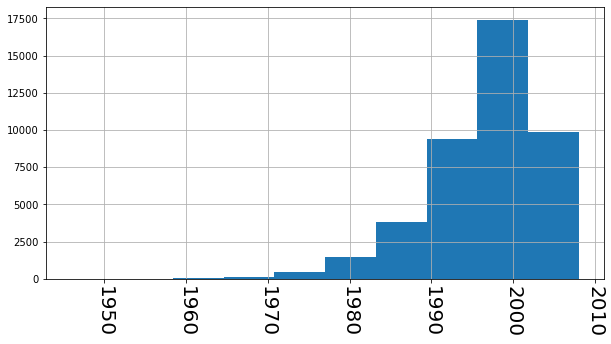

In [52]:
df.earliest_cr_line.hist(figsize=[10,5], xlabelsize=20, xrot=270)

In [53]:
df.groupby('earliest_cr_line').loan_amnt.count()

earliest_cr_line
1946       1
1950       1
1954       2
1956       1
1959       2
1961       2
1962       5
1963      12
1964       9
1965       9
1966      11
1967      18
1968      23
1969      41
1970      49
1971      50
1972      56
1973      69
1974      71
1975      87
1976     112
1977     124
1978     173
1979     178
1980     187
1981     207
1982     238
1983     360
1984     433
1985     486
1986     533
1987     664
1988     783
1989     931
1990    1113
1991    1039
1992    1155
1993    1610
1994    2166
1995    2292
1996    2426
1997    2622
1998    3066
1999    3152
2000    3465
2001    2667
2002    2059
2003    1976
2004    1890
2005    1639
2006    1343
2007     767
2008     160
Name: loan_amnt, dtype: int64

## 7 annual_inc
Dla tej kolumny średnia jest większa od mediany i występuje bardzo duża różnica między 75 kwantylem a wartością maksymalną co sugeruje występownie wartości odstających w kolumnie. Do uzupelnienia brakujących wartości wybrano medianę.

In [54]:
df.annual_inc.hist()

<AxesSubplot:>

In [55]:
df.annual_inc.describe()

count    4.253100e+04
mean     6.913656e+04
std      6.409635e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [56]:
df['annual_inc'].fillna(df.annual_inc.median(), inplace=True)

## 8 open_acc
uzupełniono najczęściej występującą wartością

<AxesSubplot:>

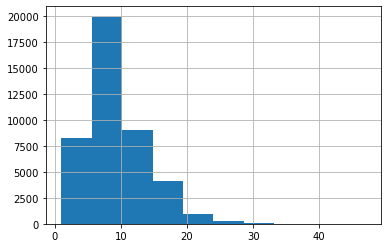

In [57]:
df.open_acc.hist()

In [58]:
df.open_acc.describe()

count    42506.000000
mean         9.343951
std          4.496274
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         47.000000
Name: open_acc, dtype: float64

In [59]:
df['open_acc'].fillna(df.open_acc.median(), inplace=True)

## 9 pub_rec
uzupełniono najczęściej występującą wartością 

<AxesSubplot:>

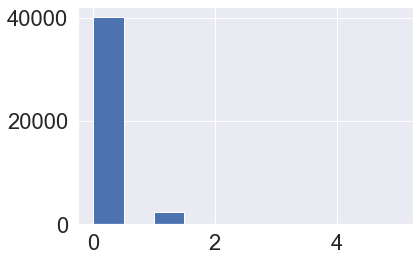

In [151]:
df.pub_rec.hist()

In [152]:
df['pub_rec'].fillna(0, inplace=True)

## 10 revol_util
Usunięto znak % i zmieniono wartości na numeryczne. Brakujące wartości zastąpiono medianią

In [62]:
df.revol_util

0        83.7%
1         9.4%
2        98.5%
3          21%
4        53.9%
         ...  
42531      NaN
42532      NaN
42533      NaN
42534      NaN
42535      NaN
Name: revol_util, Length: 42535, dtype: object

In [63]:
df.revol_util = df.revol_util.str.replace('%', '')

In [64]:
df['revol_util'] = pd.to_numeric(df['revol_util'])

<AxesSubplot:>

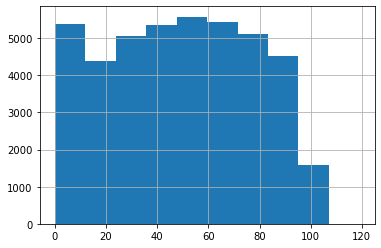

In [65]:
df.revol_util.hist()

In [66]:
df.revol_util.describe()

count    42445.000000
mean        49.117156
std         28.364272
min          0.000000
25%         25.700000
50%         49.700000
75%         72.700000
max        119.000000
Name: revol_util, dtype: float64

In [67]:
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

## 11 int_rate
przekształcono % na wartość numeryczną

In [68]:
df.int_rate = df.int_rate.str.replace('%', '')

In [69]:
df['int_rate'] = pd.to_numeric(df['int_rate'])

## 12 total_acc
rozkład danych odbiega od rozkładu normalnego, z tego powodu w fillna wykorzystano medianę

In [70]:
df.total_acc.describe()

count    42506.000000
mean        22.124406
std         11.592811
min          1.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<AxesSubplot:>

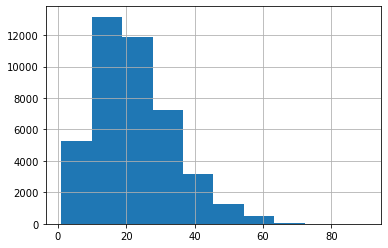

In [71]:
df.total_acc.hist()

In [72]:
df['total_acc'].fillna(df.total_acc.median(), inplace=True)

## 13 pub_rec_bankruptcies
zastąpiono brakujące wartości najczęściej występującą

<AxesSubplot:>

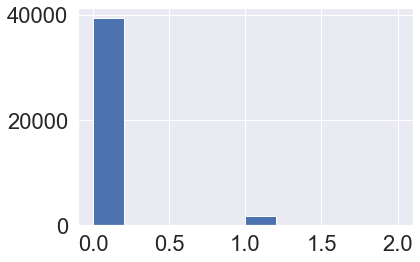

In [153]:
df.pub_rec_bankruptcies.hist()

In [154]:
df.pub_rec_bankruptcies.describe()# przed fillna

count    41170.000000
mean         0.045227
std          0.208737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [155]:
bankrupt=df.groupby('pub_rec_bankruptcies').loan_amnt.count()
bankrupt

pub_rec_bankruptcies
0.0    39316
1.0     1846
2.0        8
Name: loan_amnt, dtype: int64

In [156]:
df['pub_rec_bankruptcies'].fillna(0, inplace=True)

## 14 issue_d
pozostawiono tylko rok udzielenia pożyczki

In [77]:
df.groupby('issue_d').loan_amnt.count()
df.issue_d.describe()

count        42535
unique          55
top       Dec-2011
freq          2267
Name: issue_d, dtype: object

In [78]:
df.issue_d=df.issue_d.str.slice(-4,)
df.issue_d.describe()

count     42535
unique        5
top        2011
freq      21721
Name: issue_d, dtype: object

<AxesSubplot:>

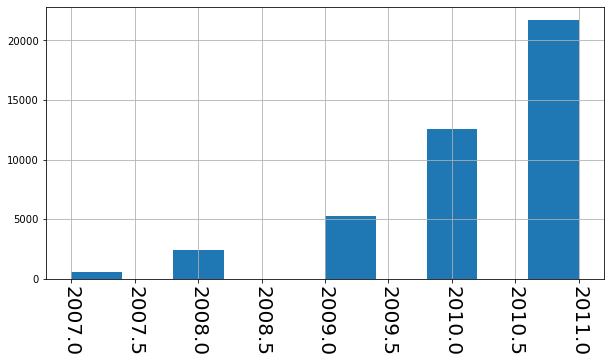

In [79]:
df['issue_d'] = pd.to_numeric(df['issue_d'])
df.issue_d.hist(figsize=[10,5], xlabelsize=20, xrot=270)

## 15 ujednolicenie loan_status

In [80]:
df.groupby('loan_status').loan_amnt.count()

loan_status
Charged Off                                             5670
Does not meet the credit policy. Status:Charged Off      761
Does not meet the credit policy. Status:Fully Paid      1988
Fully Paid                                             34116
Name: loan_amnt, dtype: int64

In [81]:
df['loan_status']=df.loan_status.str.replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')

C:\Users\T470\AppData\Local\Temp/ipykernel_18380/3770419865.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['loan_status']=df.loan_status.str.replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')


In [82]:
df.loc[df['loan_status']=='Does not meet the credit policy. Status:Fully Paid', 'loan_status']='Fully Paid'

## 16 verification status

In [83]:
df.groupby('verification_status').loan_amnt.count()

verification_status
Not Verified       18758
Source Verified    10306
Verified           13471
Name: loan_amnt, dtype: int64

## 17 Home ownership
Utworzenie 4 kategorii:
1. Own
2. Mortage
3. Rent
4. Other

In [84]:
df.groupby('home_ownership').loan_amnt.count()

home_ownership
MORTGAGE    18959
NONE            8
OTHER         136
OWN          3251
RENT        20181
Name: loan_amnt, dtype: int64

In [85]:
df.loc[df['home_ownership']=='NONE', 'home_ownership']='OTHER'

In [86]:
df.groupby('home_ownership').loan_amnt.count()

home_ownership
MORTGAGE    18959
OTHER         144
OWN          3251
RENT        20181
Name: loan_amnt, dtype: int64

## 18 acc_now_delinq
Usunięto kolumnę ze względu na brak zróżnicowania wartości. Na 42535 obserwacji wartość 0 występuje w 42502, wartość 1 w 4, pozostałe są puste. Uzupełnienie braków najczęsciej wystepującą wartością - czyli 0 nic nie zmieni.

In [159]:
df.groupby('acc_now_delinq').loan_amnt.count()

acc_now_delinq
0.0    42502
1.0        4
Name: loan_amnt, dtype: int64

## 19 delinq_amnt
Usunięto kolumnę ze względu na brak zróżnicowania wartości. Na 42535 obserwacji wartość 0 występuje w 42504, inna wartość w 2, pozostałe są puste. Uzupełnienie braków najczęsciej wystepującą wartością - czyli 0 nic nie zmieni.

In [162]:
df.groupby('delinq_amnt').loan_amnt.count()

delinq_amnt
0.0       42504
27.0          1
6053.0        1
Name: loan_amnt, dtype: int64

## 20 tax_liens
Usunięto kolumnę ze względu na brak zróżnicowania wartości. Na 42535 obserwacji wartość 0 występuje w 42429, wartość 1 w 1, pozostałe są puste. Uzupełnienie braków najczęsciej wystepującą wartością - czyli 0 nic nie zmieni.

In [167]:
df.groupby('tax_liens').loan_amnt.count()

tax_liens
0.0    42429
1.0        1
Name: loan_amnt, dtype: int64

In [168]:
df.drop(columns=['acc_now_delinq', 'delinq_amnt', 'tax_liens'], axis=1,inplace=True)

In [ ]:
df.isna().sum().sum()

In [172]:
df.shape

(42535, 27)

# 2. EDA

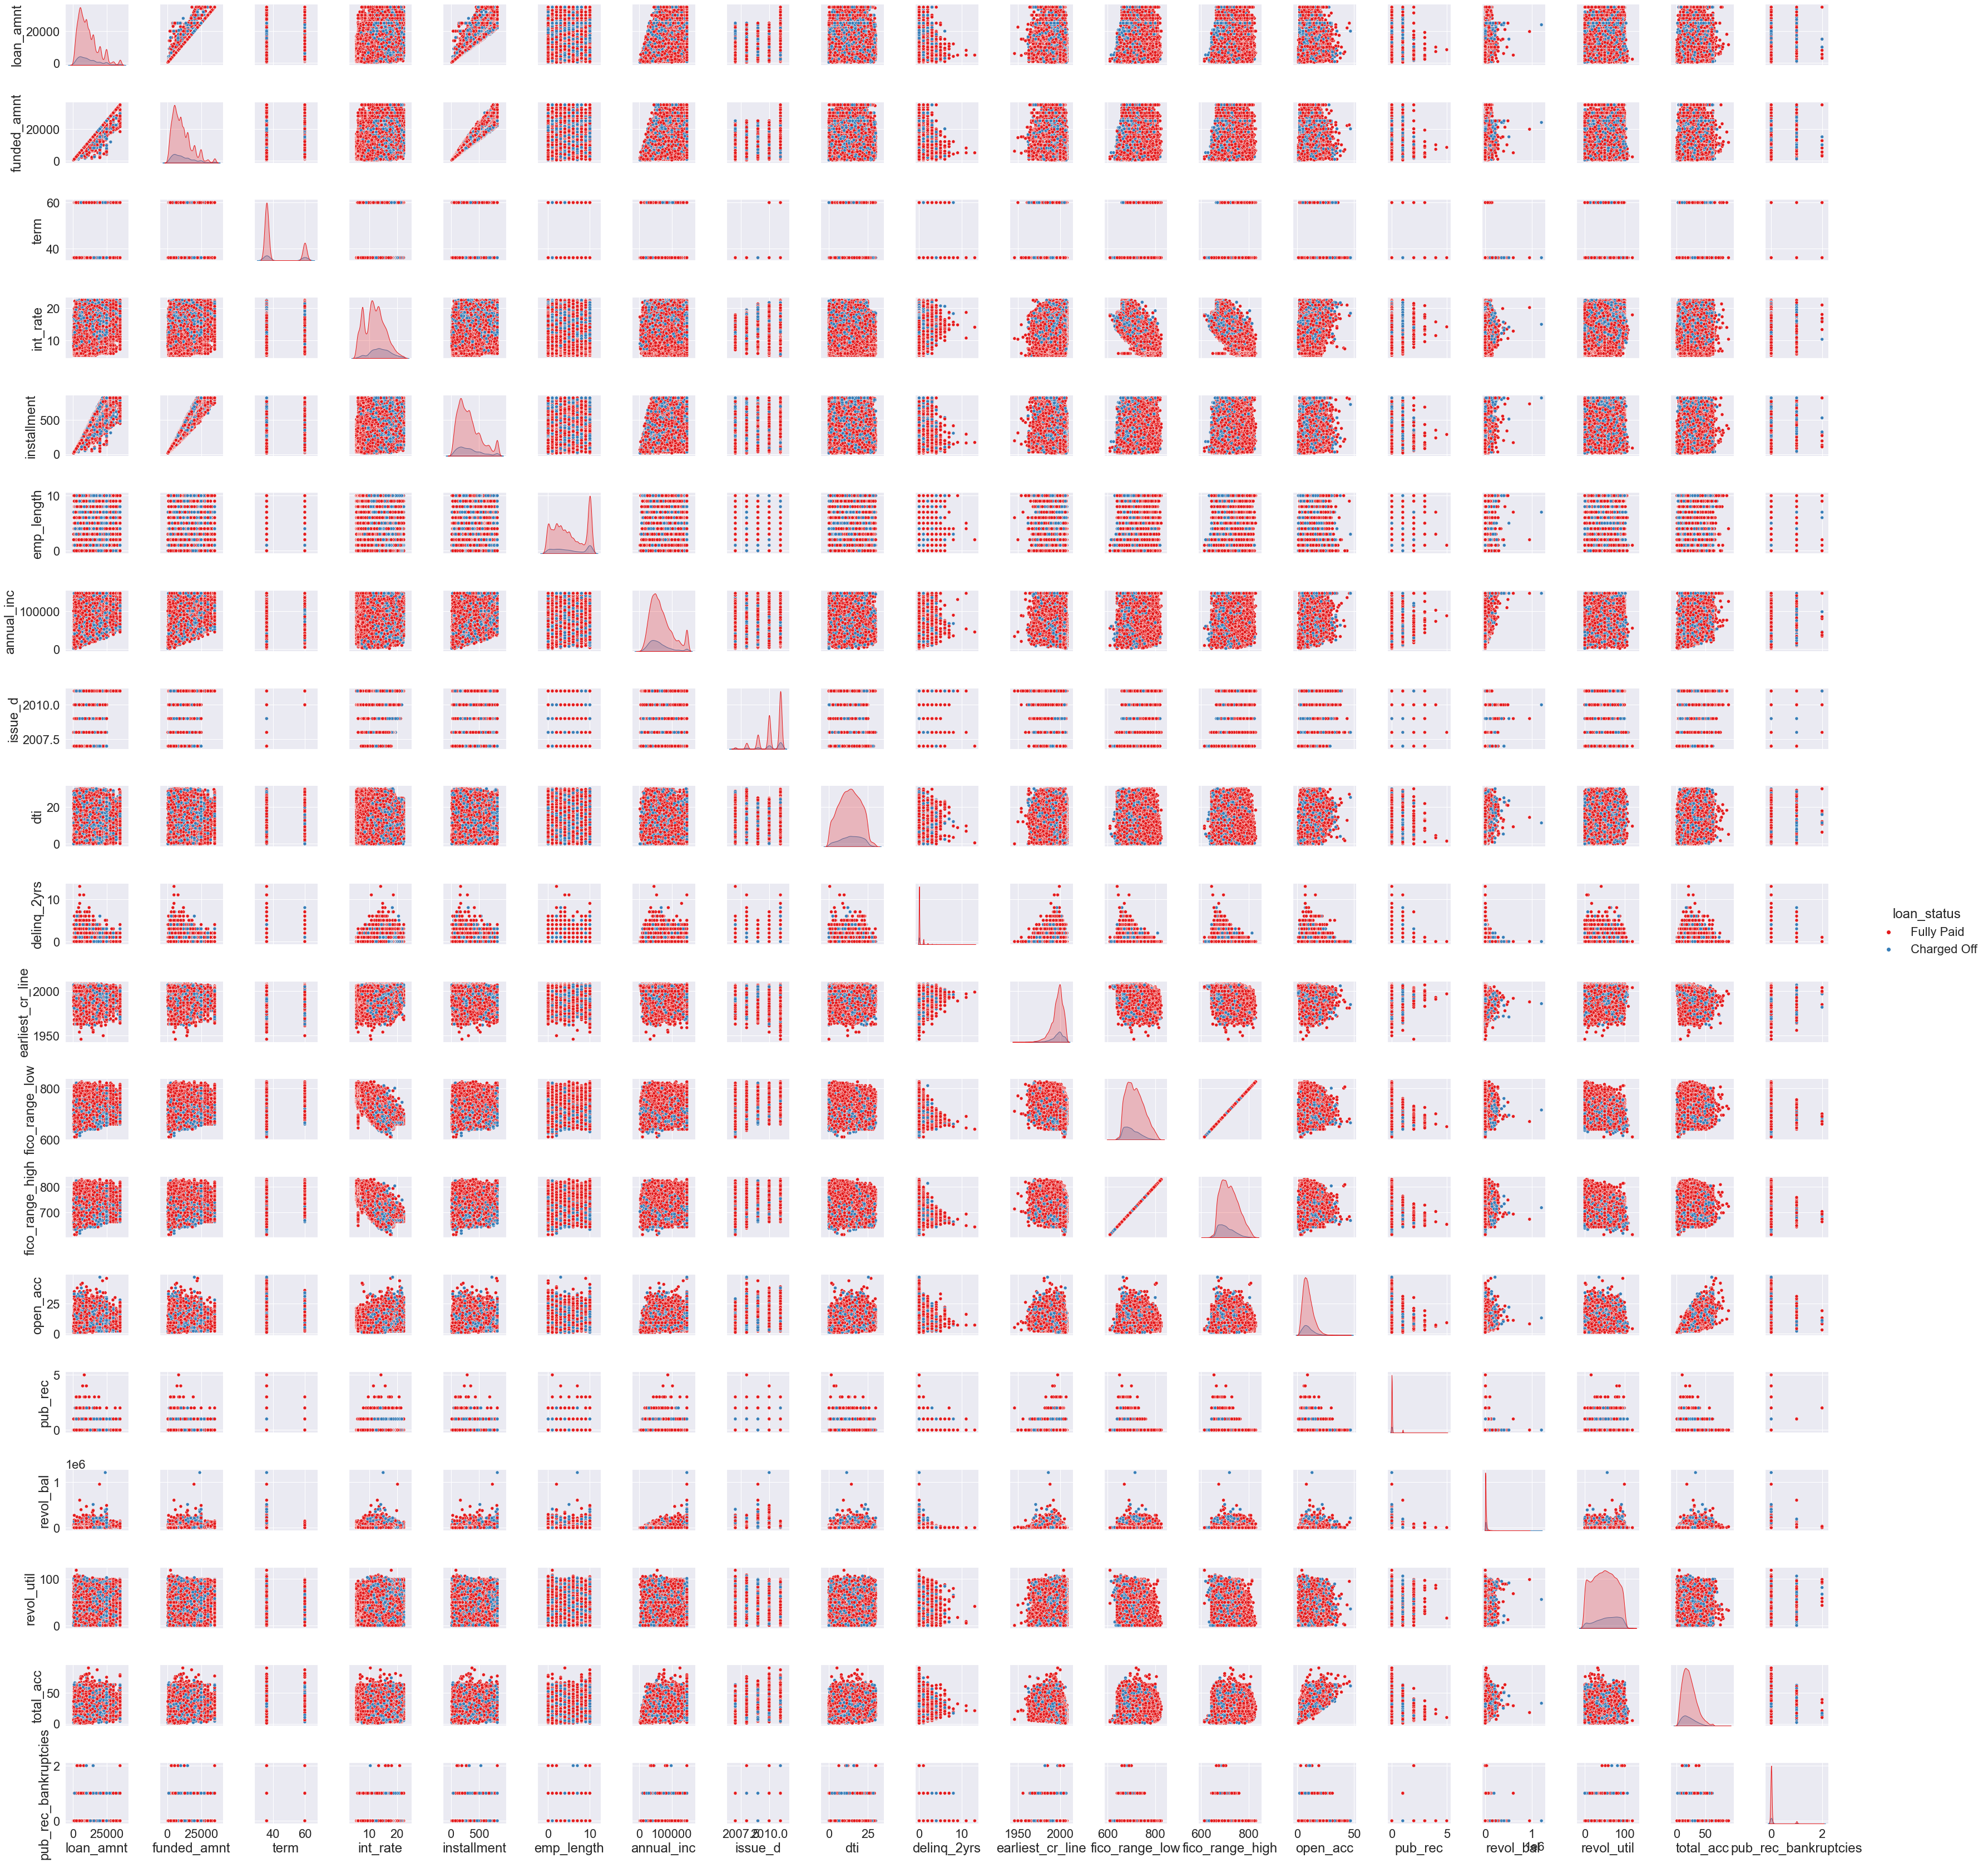

In [174]:
#df.hist(figsize=(12,8),layout=(3,7), bins=15)
sns.pairplot(df, hue='loan_status', palette='Set1')

In [88]:
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold, StratifiedKFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

C:\Users\T470\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

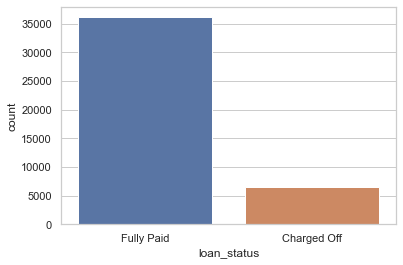

In [89]:
sns.countplot(df['loan_status'])

rozszerzenie tabeli z opisem danych dla szybszego wychwycenia wartości odstających

In [90]:
desc=df.describe().T

In [91]:
desc['val_range'],desc['IQR']=desc['max']-desc['min'],desc['75%']-desc['25%']

In [92]:
desc['L_outliers']=desc['25%']-1.5*desc['IQR']
desc['U_outliers']=desc['75%']+1.5*desc['IQR']

In [93]:
desc

count          mean           std      min       25%  \
loan_amnt             42535.0  11089.722581   7410.938391   500.00   5200.00   
funded_amnt           42535.0  10821.585753   7146.914675   500.00   5000.00   
term                  42535.0     42.207218     10.509342    36.00     36.00   
int_rate              42535.0     12.165016      3.707936     5.42      9.63   
installment           42535.0    322.623063    208.927216    15.67    165.52   
emp_length            42535.0      5.055813      3.613600     0.00      2.00   
annual_inc            42535.0  69135.603176  64093.411134  1896.00  40000.00   
issue_d               42535.0   2010.231456      0.966383  2007.00   2010.00   
dti                   42535.0     13.373043      6.726315     0.00      8.20   
delinq_2yrs           42535.0      0.152345      0.512247     0.00      0.00   
earliest_cr_line      42535.0   1996.585024      6.838363  1946.00   1993.00   
fico_range_low        42535.0    713.052545     36.188439   610.00    685.00   
fico_range_high       42535.0    717.052545     36.188439   614.00    689.00   
open_acc              42535.0      9.343717      4.494750     1.00      6.00   
pub_rec               42506.0      0.058156      0.245713     0.00      0.00   
revol_bal             42535.0  14297.860915  22018.441010     0.00   3635.00   
revol_util            42535.0     49.118389     28.334260     0.00     25.80   
total_acc             42535.0     22.122958     11.588991     1.00     13.00   
acc_now_delinq        42506.0      0.000094      0.009700     0.00      0.00   
delinq_amnt           42506.0      0.143039     29.359579     0.00      0.00   
pub_rec_bankruptcies  41170.0      0.045227      0.208737     0.00      0.00   
tax_liens             42430.0      0.000024      0.004855     0.00      0.00   

                           50%       75%         max   val_range       IQR  \
loan_amnt              9700.00  15000.00    35000.00    34500.00   9800.00   
funded_amnt            9600.00  15000.00    35000.00    34500.00  10000.00   
term                     36.00     60.00       60.00       24.00     24.00   
int_rate                 11.99     14.72       24.59       19.17      5.09   
installment             277.69    428.18     1305.19     1289.52    262.66   
emp_length                4.00      9.00       10.00       10.00      7.00   
annual_inc            59000.00  82500.00  6000000.00  5998104.00  42500.00   
issue_d                2011.00   2011.00     2011.00        4.00      1.00   
dti                      13.47     18.68       29.99       29.99     10.48   
delinq_2yrs               0.00      0.00       13.00       13.00      0.00   
earliest_cr_line       1998.00   2001.00     2008.00       62.00      8.00   
fico_range_low          710.00    740.00      825.00      215.00     55.00   
fico_range_high         714.00    744.00      829.00      215.00     55.00   
open_acc                  9.00     12.00       47.00       46.00      6.00   
pub_rec                   0.00      0.00        5.00        5.00      0.00   
revol_bal              8821.00  17251.00  1207359.00  1207359.00  13616.00   
revol_util               49.70     72.60      119.00      119.00     46.80   
total_acc                20.00     29.00       90.00       89.00     16.00   
acc_now_delinq            0.00      0.00        1.00        1.00      0.00   
delinq_amnt               0.00      0.00     6053.00     6053.00      0.00   
pub_rec_bankruptcies      0.00      0.00        2.00        2.00      0.00   
tax_liens                 0.00      0.00        1.00        1.00      0.00   

                      L_outliers  U_outliers  
loan_amnt              -9500.000   29700.000  
funded_amnt           -10000.000   30000.000  
term                       0.000      96.000  
int_rate                   1.995      22.355  
installment             -228.470     822.170  
emp_length                -8.500      19.500  
annual_inc            -23750.000  146250.000  
issue_d     

In [94]:
# jeśli w tabelce zauważono wrtości odstające trzeba się im przyjżeć: 
col=['annual_inc', 'int_rate', 'installment']
for i in col:
    print('\n ', i,'\n')
    print ('1.Values')
    print('Range of values: ', df[i].max()-df[i].min())
    print('Minimum: ', df[i].min())
    print('Maximum: ',df[i].max())
    print('Mean value: ', df[i].mean())
    print('Median value: ',df[i].median())
    print('Standard deviation: ', df[i].std())
    print('\n 2.Quartliles')
    Q1=df[i].quantile(q=0.25)
    Q3=df[i].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(df[i]))
    print('\n 3.Outlier detection from Interquartile range (IQR) in original data')
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in ',i,': ', L_outliers)
    print('Upper outliers in ',i,': ', U_outliers)
    print('Number of outliers in ',i,'upper : ', df[df[i]>U_outliers][i].count())
    print('Number of outliers in ',i,'lower : ',  df[df[i]<L_outliers][i].count())
    print('% of Outlier in ',i,'upper: ',round(df[df[i]>U_outliers][i].count()*100/len(df)), '%')
    print('% of Outlier in ',i,'lower: ',round(df[df[i]<L_outliers][i].count()*100/len(df)), '%')


  annual_inc 

1.Values
Range of values:  5998104.0
Minimum:  1896.0
Maximum:  6000000.0
Mean value:  69135.603176443
Median value:  59000.0
Standard deviation:  64093.41113415836

 2.Quartliles
1st Quartile (Q1) is:  40000.0
3st Quartile (Q3) is:  82500.0
Interquartile range (IQR) is  42500.0

 3.Outlier detection from Interquartile range (IQR) in original data
Lower outliers in  annual_inc :  -23750.0
Upper outliers in  annual_inc :  146250.0
Number of outliers in  annual_inc upper :  2032
Number of outliers in  annual_inc lower :  0
% of Outlier in  annual_inc upper:  5 %
% of Outlier in  annual_inc lower:  0 %

  int_rate 

1.Values
Range of values:  19.17
Minimum:  5.42
Maximum:  24.59
Mean value:  12.165015634182389
Median value:  11.99
Standard deviation:  3.707935508195092

 2.Quartliles
1st Quartile (Q1) is:  9.63
3st Quartile (Q3) is:  14.72
Interquartile range (IQR) is  5.09

 3.Outlier detection from Interquartile range (IQR) in original data
Lower outliers in  int_rate : 

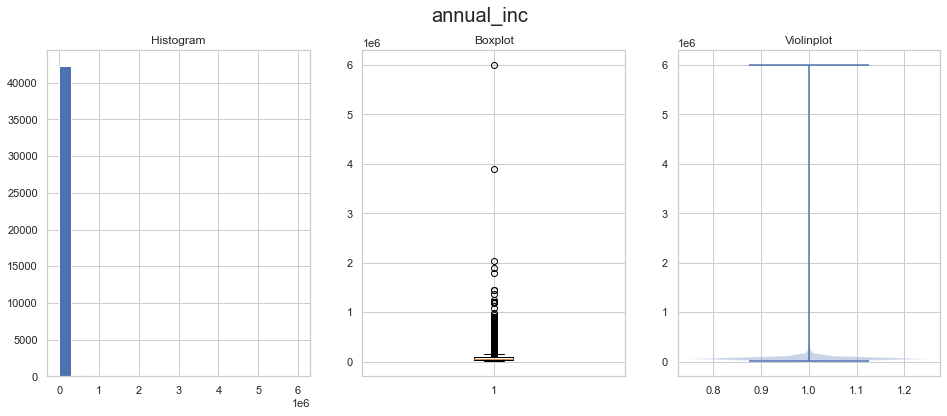

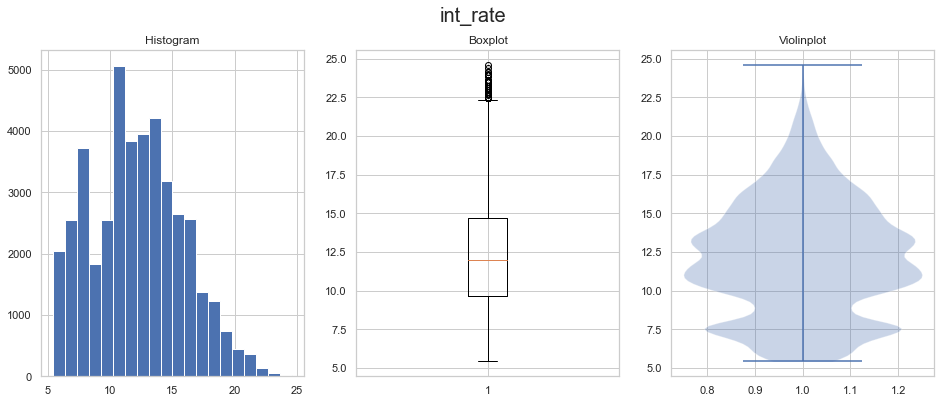

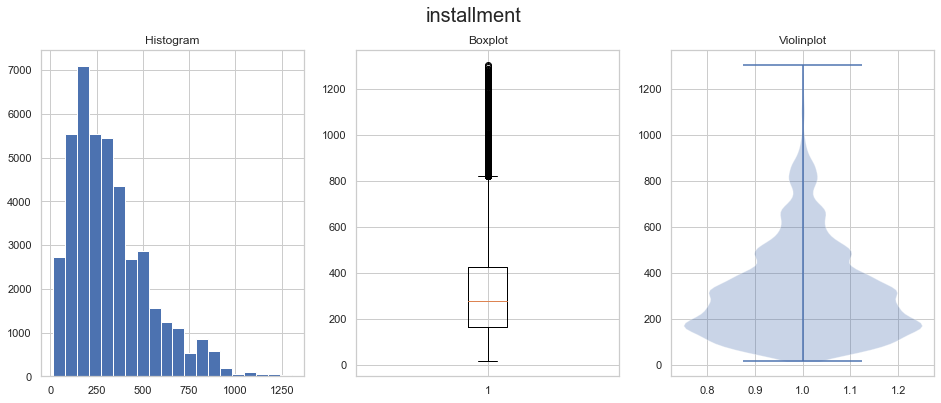

In [95]:
for i in col:
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    axes[0].hist(df[i], bins=20)
    axes[0].set_title('Histogram')

    axes[1].boxplot(df[i])
    axes[1].set_title('Boxplot')

    axes[2].violinplot(df[i])
    axes[2].set_title('Violinplot')

    fig.suptitle(i, fontsize=20)

Analiza danych z tabeli desc, outliers'ów oraz wykresów powyrzej wykazała dużą ilość wartości odstających dla annual_inc - okazuje się że 5% kredytobiorców wykazała dochody wieksze od U_outliers - wartości odstające zostały zastąpione wartością U_outliers dla annual_inc. Podobnie zastąpiono dane odstające w kolumnach installment oraz int_rate. Wartości odstające we wszystkich kolumnach zastąpiono najwyższą nieodstającą wartością, ponieważ wysokość rocznych dochodów, wysokosc raty oraz oprocentowanie są danymi kluczowymi dla możliwości spłaty zobowiązania. Uznano że zastąpienie odstających wartości średnią/medianą gorzej odda proporcje np. wysokości dochodu do kwoty udzielonej pożyczki.

Dane z tych kolumn uzyskały rozkład bardziej zbliżony do normalnego, co widać na histogramie i violinplot poniżej. Oczywiście na boxplot nie widać już wartości odstających. 

In [96]:
df.loc[df['annual_inc'] >146250, 'annual_inc']=146250

In [97]:
df.loc[df['installment'] >822.17, 'installment']=822.17

In [98]:
df.loc[df['int_rate'] >22.35, 'int_rate']=22.35

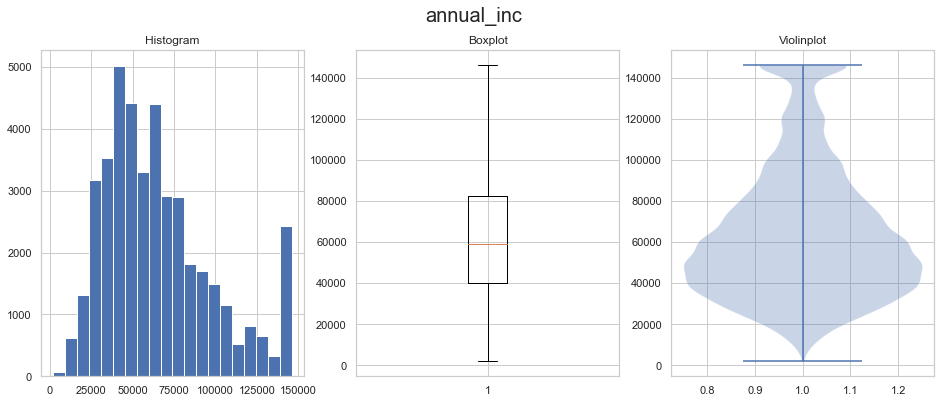

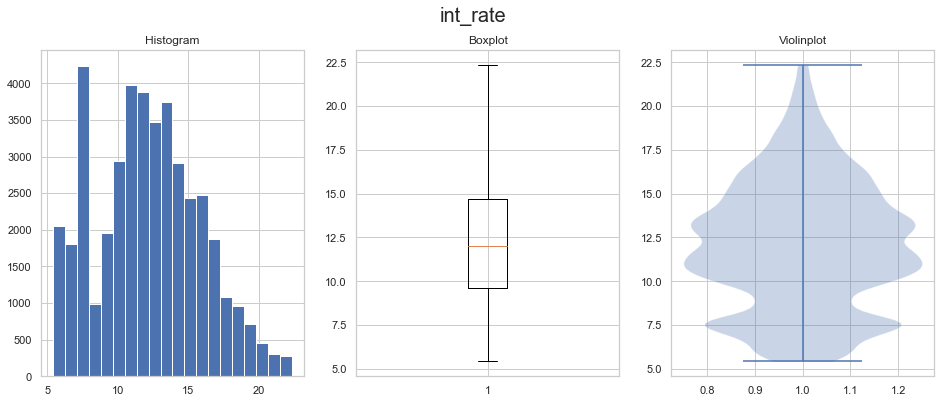

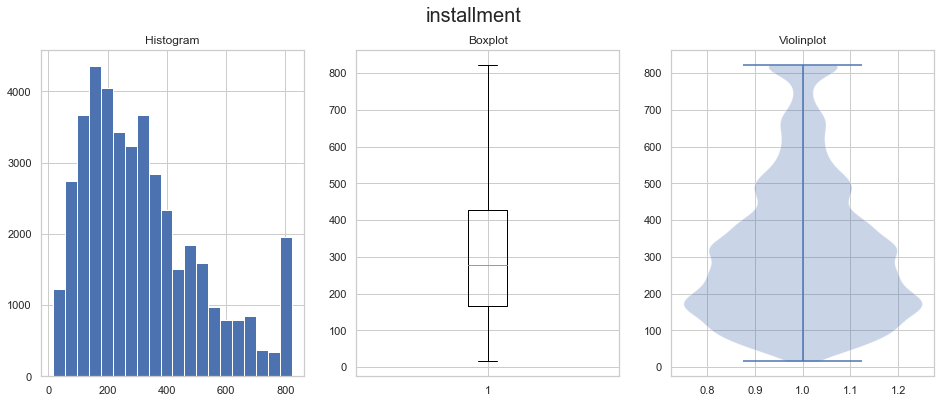

In [99]:
for i in col:
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    axes[0].hist(df[i], bins=20)
    axes[0].set_title('Histogram')

    axes[1].boxplot(df[i])
    axes[1].set_title('Boxplot')

    axes[2].violinplot(df[i])
    axes[2].set_title('Violinplot')

    fig.suptitle(i, fontsize=20)

Problem w zadananiu jest klasyfikacyjny, ale uważam, że warto wziąć pod uwagę liniową korelację miedzy danymi. Na podstawie analizy heat mapy wytypowano kolumny, które:

a) powielają informację z innej kolumny: fico range low i fico range high, pub_rec i pub_rec_bankruptcies, czy grade, subgrade i int_rate,

b) są ze sobą skorelowane np. fico-range i int_rate lub int_rate ib revol_util

In [100]:
dff=df.copy()

In [101]:
from sklearn.preprocessing import LabelEncoder

cols = ('grade', 'sub_grade', 'emp_title','home_ownership', 'verification_status', 'loan_status', 'purpose',
        'addr_state', 'issue_d', 'earliest_cr_line')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dff[c].values)) 
    dff[c] = lbl.transform(list(dff[c].values))

In [102]:
dff

loan_amnt  funded_amnt  term  int_rate  installment  grade  sub_grade  \
0         5000.0       5000.0    36     10.65       162.87      1          6   
1         2500.0       2500.0    60     15.27        59.83      2         13   
2         2400.0       2400.0    36     15.96        84.33      2         14   
3        10000.0      10000.0    36     13.49       339.31      2         10   
4         3000.0       3000.0    60     12.69        67.79      1          9   
...          ...          ...   ...       ...          ...    ...        ...   
42531     3500.0       3500.0    36     10.28       113.39      2         10   
42532     1000.0       1000.0    36      9.64        32.11      1          8   
42533     2525.0       2525.0    36      9.33        80.69      1          7   
42534     6500.0       6500.0    36      8.38       204.84      0          4   
42535     5000.0       5000.0    36      7.75       156.11      0          2   

       emp_title  emp_length  home_ownership  annual_inc  verification_status  \
0              2        10.0               3     24000.0                    2   
1              3         0.0               3     30000.0                    1   
2              2        10.0               3     12252.0                    0   
3              3        10.0               3     49200.0                    1   
4              3         1.0               3     80000.0                    1   
...          ...         ...             ...         ...                  ...   
42531          2         0.0               3    146250.0                    0   
42532          3         0.0               3     12000.0                    0   
42533          2         0.0               3    110000.0                    0   
42534          2         0.0               1     59000.0                    0   
42535          3        10.0               0     70000.0                    0   

       issue_d  loan_status  purpose  addr_state    dti  delinq_2yrs  \
0            4            1        0           3  27.65          0.0   
1            4            0        4          10   1.00          0.0   
2            4            1        5          14   8.72          0.0   
3            4            1        2           4  20.00          0.0   
4            4            1        2          36  17.94          0.0   
...        ...          ...      ...         ...    ...          ...   
42531        0            1        2          33  10.00          0.0   
42532        0            1        2          19  10.00          0.0   
42533        0            1        2          33  10.00          0.0   
42534        0            1        2          33   4.00          0.0   
42535        0            1        2           6   8.81          0.0   

       earliest_cr_line  fico_range_low  fico_range_high  open_acc  pub_rec  \
0                    29           735.0            739.0       3.0      0.0   
1                    43           740.0            744.0       3.0      0.0   
2                    45           735.0            739.0       2.0      0.0   
3                    40           690.0            694.0      10.0      0.0   
4                    40           695.0            699.0      15.0      0.0   
...                 ...             ...              ...       ...      ...   
42531                44           685.0            689.0       9.0      NaN   
42532                44           695.0            699.0       9.0      NaN   
42533                44           710.0            714.0       9.0      NaN   
42534                44           740.0            744.0       9.0      NaN   
42535                44           770.0            774.0       9.0      NaN   

       revol_bal  revol_util  total_acc  acc_now_delinq  delinq_amnt  \
0        13648.0        83.7        9.0             0.0          0.0   
1         1687.0         9.4        4.0             0.0          0.0   
2         2956.0        98.5       10.0    

In [103]:
dff_corr=(dff.corr()).round(2)

In [104]:
dff_corr

loan_amnt  funded_amnt  term  int_rate  installment  \
loan_amnt                  1.00         0.98  0.36      0.29         0.93   
funded_amnt                0.98         1.00  0.34      0.29         0.96   
term                       0.36         0.34  1.00      0.43         0.11   
int_rate                   0.29         0.29  0.43      1.00         0.27   
installment                0.93         0.96  0.11      0.27         1.00   
grade                      0.26         0.26  0.38      0.94         0.24   
sub_grade                  0.27         0.27  0.39      0.95         0.25   
emp_title                 -0.01        -0.01 -0.02     -0.01        -0.01   
emp_length                 0.14         0.14  0.11     -0.01         0.11   
home_ownership            -0.18        -0.17 -0.11      0.06        -0.14   
annual_inc                 0.44         0.43  0.08      0.08         0.44   
verification_status        0.41         0.41  0.26      0.19         0.36   
issue_d                    0.14         0.15  0.28      0.01         0.07   
loan_status               -0.04        -0.04 -0.13     -0.20        -0.02   
purpose                   -0.15        -0.15 -0.00     -0.05        -0.16   
addr_state                -0.00        -0.00  0.01      0.00        -0.00   
dti                        0.07         0.06  0.08      0.12         0.06   
delinq_2yrs               -0.03        -0.03  0.00      0.15        -0.02   
earliest_cr_line          -0.19        -0.18 -0.05      0.12        -0.17   
fico_range_low             0.13         0.13  0.00     -0.70         0.07   
fico_range_high            0.13         0.13  0.00     -0.70         0.07   
open_acc                   0.18         0.17  0.05      0.02         0.18   
pub_rec                   -0.05        -0.05  0.01      0.10        -0.05   
revol_bal                  0.25         0.25  0.03      0.08         0.27   
revol_util                 0.07         0.07  0.06      0.46         0.10   
total_acc                  0.26         0.25  0.10     -0.03         0.24   
acc_now_delinq            -0.01        -0.01 -0.01      0.00        -0.00   
delinq_amnt               -0.00        -0.00 -0.00      0.00        -0.00   
pub_rec_bankruptcies      -0.04        -0.04  0.01      0.09        -0.03   
tax_liens                 -0.01        -0.01 -0.00      0.00        -0.01   

                      grade  sub_grade  emp_title  emp_length  home_ownership  \
loan_amnt              0.26       0.27      -0.01        0.14           -0.18   
funded_amnt            0.26       0.27      -0.01        0.14           -0.17   
term                   0.38       0.39      -0.02        0.11           -0.11   
int_rate               0.94       0.95      -0.01       -0.01            0.06   
installment            0.24       0.25      -0.01        0.11           -0.14   
grade                  1.00       0.98      -0.01       -0.02            0.05   
sub_grade              0.98       1.00      -0.01       -0.03            0.05   
emp_title             -0.01      -0.01       1.00       -0.14            0.02   
emp_length            -0.02      -0.03      -0.14        1.00           -0.25   
home_ownership         0.05       0.05       0.02       -0.25            1.00   
annual_inc             0.08       0.08       0.00        0.16           -0.33   
verification_status    0.15       0.16      -0.04        0.10           -0.08   
issue_d               -0.09      -0.10      -0.04        0.15           -0.05   
loan_status           -0.20      -0.20       0.01       -0.02           -0.02   
purpose               -0.03      -0.04      -0.02       -0.03           -0.02   
addr_state             0.00       0.00      -0.01        0.00           -0.04   
dti                    0.11       0.12      -0.03        0.05            0.01   
delinq_2yrs            0.16       0.17      -0.01        0.01           -0.02   
earliest_cr_line       0.10       0.10       0.04       -0.29            0.27   
fico_range_low

<AxesSubplot:>

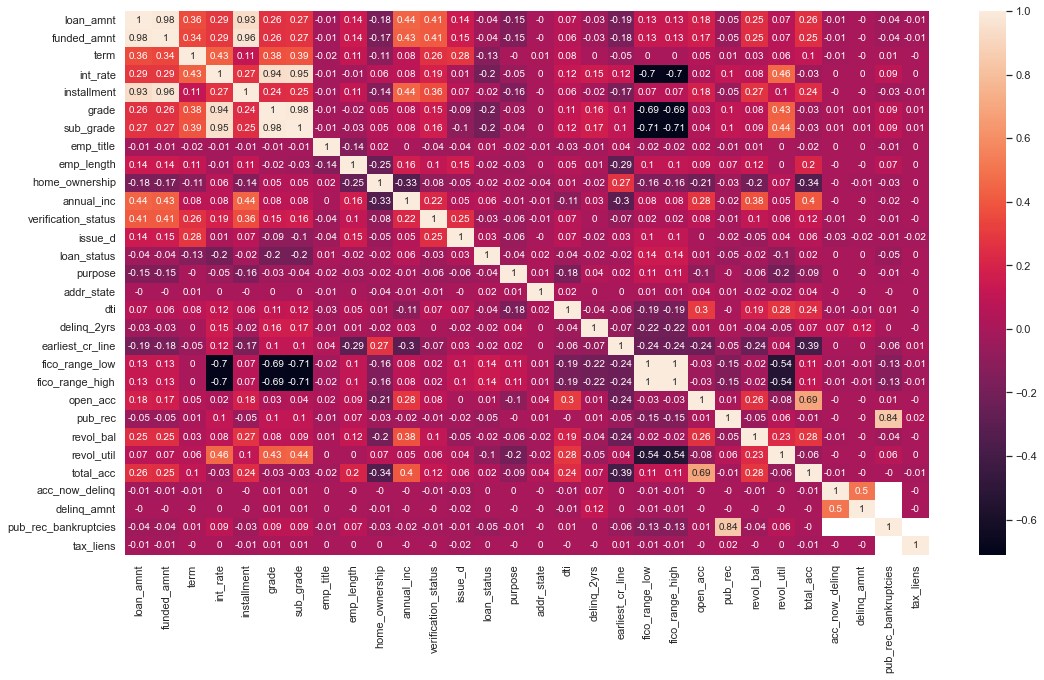

In [105]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(dff_corr, 
         xticklabels=dff_corr.columns, 
         yticklabels=dff_corr.columns,
           annot=True)

Czy pub_rec i pub_rec_bankruptcies powielają te same dane?

Korelacja miedzy kolumnami wynosi tylko 0,82. Jednak poniższa analiza zawartości kolumn pokazuje że wszystkie bankructwa są uwzględnione w pub_rec- zdecydowano się usunąć kolumnę pub_rec_bankruptcies

In [175]:
print(df.groupby('pub_rec').loan_amnt.count())
print(df.groupby('pub_rec_bankruptcies').loan_amnt.count())

pub_rec
0.0    40159
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: loan_amnt, dtype: int64
pub_rec_bankruptcies
0.0    40681
1.0     1846
2.0        8
Name: loan_amnt, dtype: int64


In [181]:
print(df[(df['pub_rec']>0)&(df['pub_rec_bankruptcies']==0)].loan_amnt.count())
print(df[(df['pub_rec']>0)&(df['pub_rec_bankruptcies']>0)].loan_amnt.count())

522
1854


In [180]:
print(df[(df['pub_rec_bankruptcies']>0)].loan_amnt.count())

1854


W wyniku analizy korelacji dostrzeżono zależność między niektórymi kolumnami. 

1. Występuje odwócona liniowa zaleznośc między wysokością FICO,a oprocentowania pożyczki w momencie jej przyznania oraz wykorzystanego limitu kredytowego. (Powszechnie wiadomo że banki/firmy pożyczkowe chętnie udzielają pożyczki osobom w dobrej sytuacji finansowej. W tym przypadku równiez osoby z dobrym scoringiem otrzymują pożyczki na lepszych warunkach.)
2. Zaobserwowano również odwróconą zależność między rokiem powstania pierwszego pierwszego zodłużenia, a rocznymi dochodami, zdolnością kredytową, liczbą kont czy ogólnym punktami FICO. 
3. Kolumny acc_now_delinq, delinq_amnt	 i tax_liens nie są skorelowane z loan_staus, a więc nie powinny być używane w modelach
4. Największa liniową korelację z Loan_status wykazuja: FICO, int_rate, term, revol_util, grade/subgrade
5. addr_state, tax_liens i delinq_amnt są słabo skorelowane z innymi 

# Pytania do części 2.

## 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

The values from fico_range_high were assigned to 0-3 cathegories according to FICO+Score+Ranges table.
A Chi-Squared test was used to examine whether values from FICO and Loan Status are independent - null hypothesis. The calculated p value indicates the probality that obtained values are random. With p less than 5% we may consider null hypothesis less probable than alternative hypotheis, where the two classes of variables are dependent. The dependency is visualized on a bar graph below, where we can see that for higher FICO the percentage of charged-off loans diminishes. When the score is low and FICO is 0, almost 25% of loans are charged off, whereas for FICO = 3 only 5,4% of loans are unpaid.

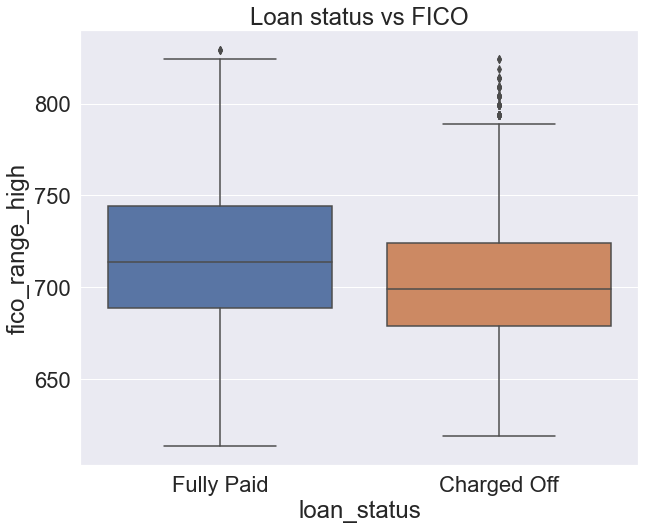

In [241]:
plt.figure(figsize=(10,8))
#df['annual_inc'] = df1['annual_inc'].astype('float')
sns.boxplot(data =df, x='loan_status', y='fico_range_high')
plt.title('Loan status vs FICO')
plt.show()

In [109]:
df1=df.copy()

In [110]:
j=[]
for i in list(df1['fico_range_high']):
    if i <=669:
        j.append(0)
    if 669<i<=739:
        j.append(1)
    if 739<i<=799:
        j.append(2)
    if 799<i:
        j.append(3)
df1.insert(loc=2,column='FICO',value=j)

In [111]:
df1.groupby('FICO').loan_amnt.count()

FICO
0     3894
1    27846
2    10171
3      624
Name: loan_amnt, dtype: int64

In [112]:
from scipy.stats import chi2_contingency

In [113]:
def Chi2(col1,col2):    
    chisqt = pd.crosstab(col1, col2, margins=True)
    value = np.array([chisqt.iloc[0].values,
                      chisqt.iloc[1].values])
    print('statistcs:', chi2_contingency(value)[0], ' p value:', chi2_contingency(value)[1], ' degres of freedom:', chi2_contingency(value)[2])

In [114]:
Chi2(df1.loan_status, df1.FICO)

statistcs: 688.0479564098666  p value: 1.3493788586296312e-147  degres of freedom: 4


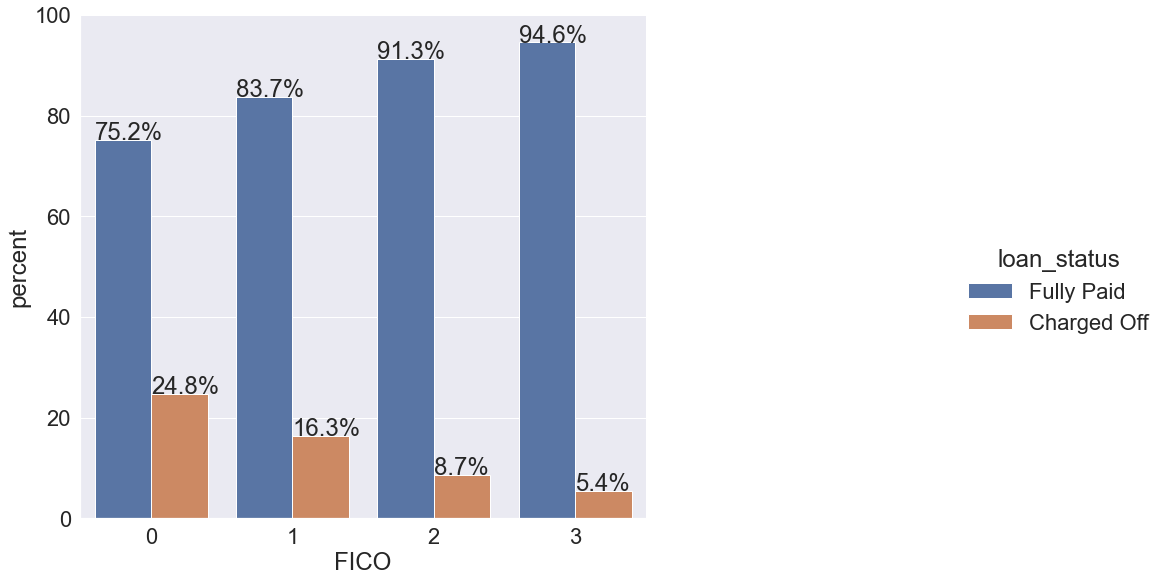

In [115]:
x,y='FICO', 'loan_status'
dfp=df1.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
sns.set(font_scale = 2)
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(20,10)

for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

On the bar plot the percentage of Fully Paid and Charged Off loans is presented in the context of FICO.  

## 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

The values from earliest_cr_line were divided into 4 categories according to a decade when first credit line was opened. All categories are populated and the null hypothesis, that values from cr_line and loan_status columns are independent was tested. The p value from Chi-Squared test is higher than 5%, which indicates high probabilty that values from both columns are independent. On bar graph The differences in percentage of paid to charged off loans show no relation to credit history categories. 
Finally, the association between earliest_cr_line and FICO for loan_status was visualised on the box graph. The credit history median differs between paid and charged off groups only for clients with FICO =3. There is some relation between length of credit history and FICO visible: the median for earliest_cr_line drops with higher FICO.

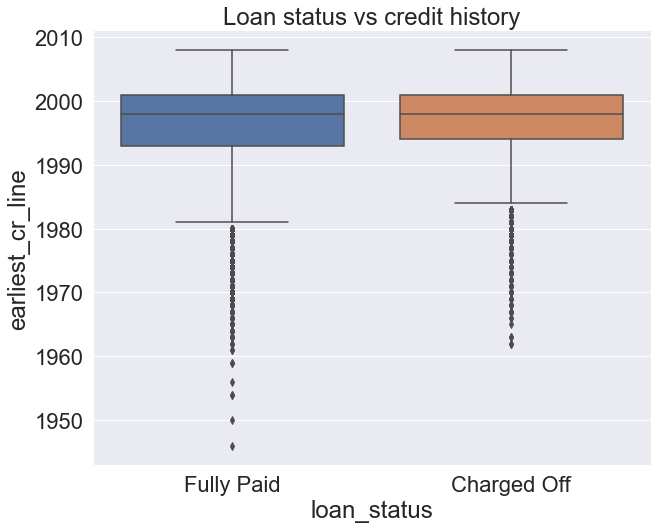

In [242]:
plt.figure(figsize=(10,8))
#df1['annual_inc'] = df1['annual_inc'].astype('float')
sns.boxplot(data =df, x='loan_status', y='earliest_cr_line')
plt.title('Loan status vs credit history')
plt.show()

In [116]:
j=[]
for i in list(df1['earliest_cr_line']):
    if i <1980:
        j.append('-1979')
    if 1980<=i<1990:
        j.append('1980-1989')
    if 1990<=i<2000:
        j.append('1990-1999')
    if 2000<=i:
        j.append('2000-2007')
df1.insert(loc=2,column='cr_line',value=j)

In [117]:
df1.groupby('cr_line').loan_amnt.count()

cr_line
-1979         1106
1980-1989     4822
1990-1999    20641
2000-2007    15966
Name: loan_amnt, dtype: int64

In [118]:
Chi2(df1.loan_status, df1.cr_line)

statistcs: 8.537329057164953  p value: 0.07376376860196707  degres of freedom: 4


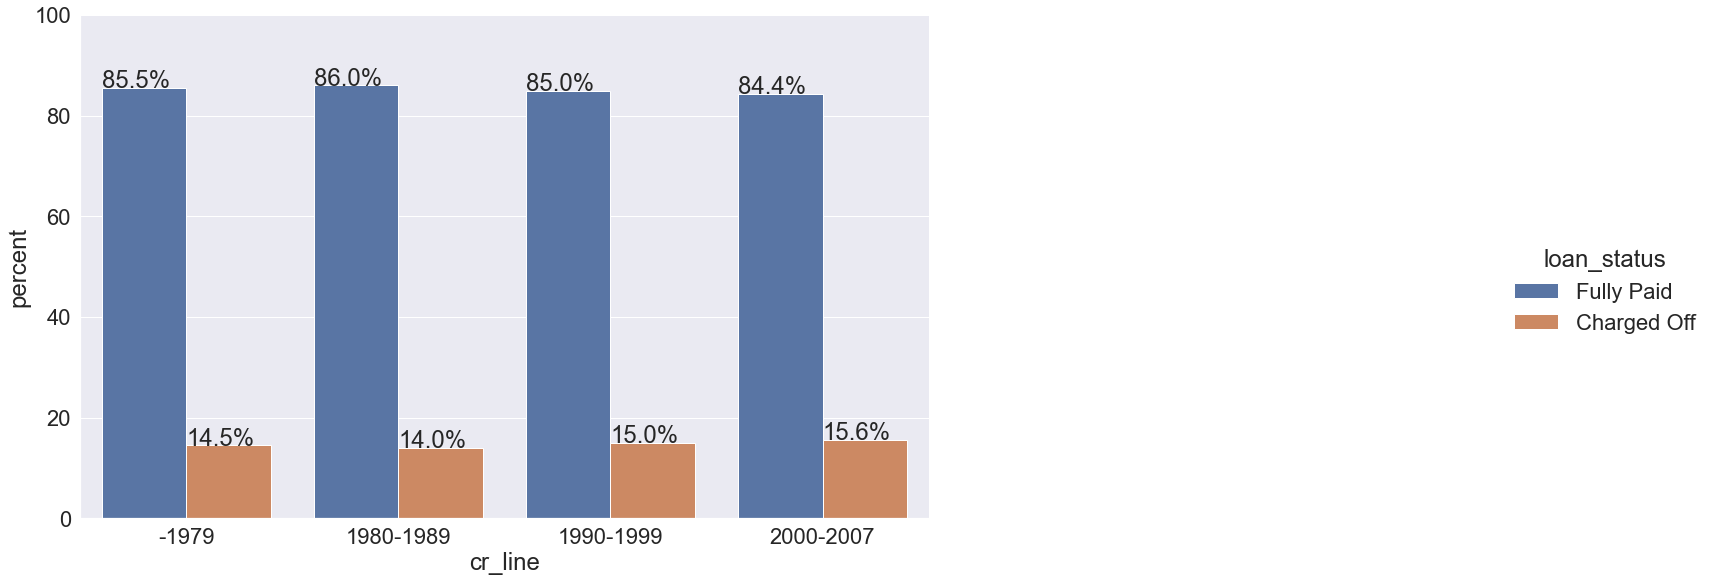

In [119]:
x,y='cr_line', 'loan_status'
dfp=df1.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(30,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

Bar plot showing the percentage of Fully Paid and Charged Off loans in the context of the length of credit history.

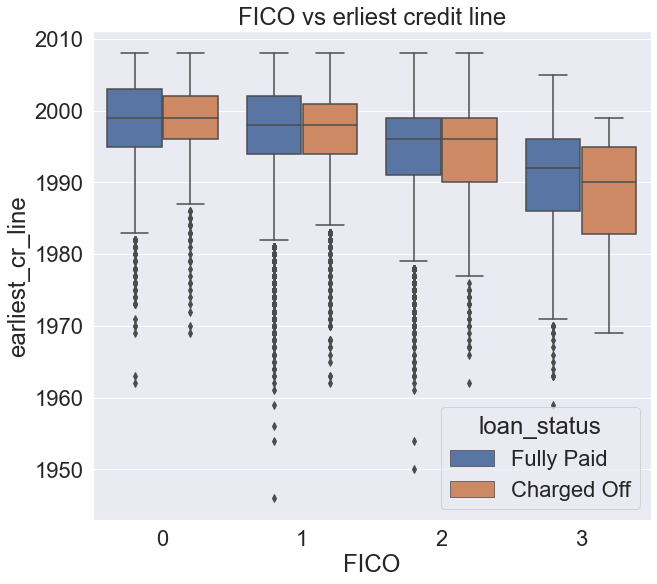

In [120]:
plt.figure(figsize=(10,9))
df1['earliest_cr_line'] = df1['earliest_cr_line'].astype('float')
sns.boxplot(data =df1, x='FICO', y='earliest_cr_line', hue ='loan_status')
plt.title('FICO vs erliest credit line')
plt.show()

Box plot showing the association between FICO and earliest_cr_line in the context of the loan_status.

## 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

The p value resulting from Chi-Squared test of home_ownership and loan_status is lower than 5% indicating that values from both columns are dependent. Analysis of bar graph shows the lowest percentage of charged off loans (14% of loans in that category) in case of clients with morage. On the other hand over 20% of clients who do not have mortage, own or rent a house did not paid the loan.

In [121]:
df1.groupby('home_ownership').loan_amnt.count()

home_ownership
MORTGAGE    18959
OTHER         144
OWN          3251
RENT        20181
Name: loan_amnt, dtype: int64

In [122]:
Chi2 (df1.loan_status, df1.home_ownership)

statistcs: 24.588540827149416  p value: 6.085982632755794e-05  degres of freedom: 4


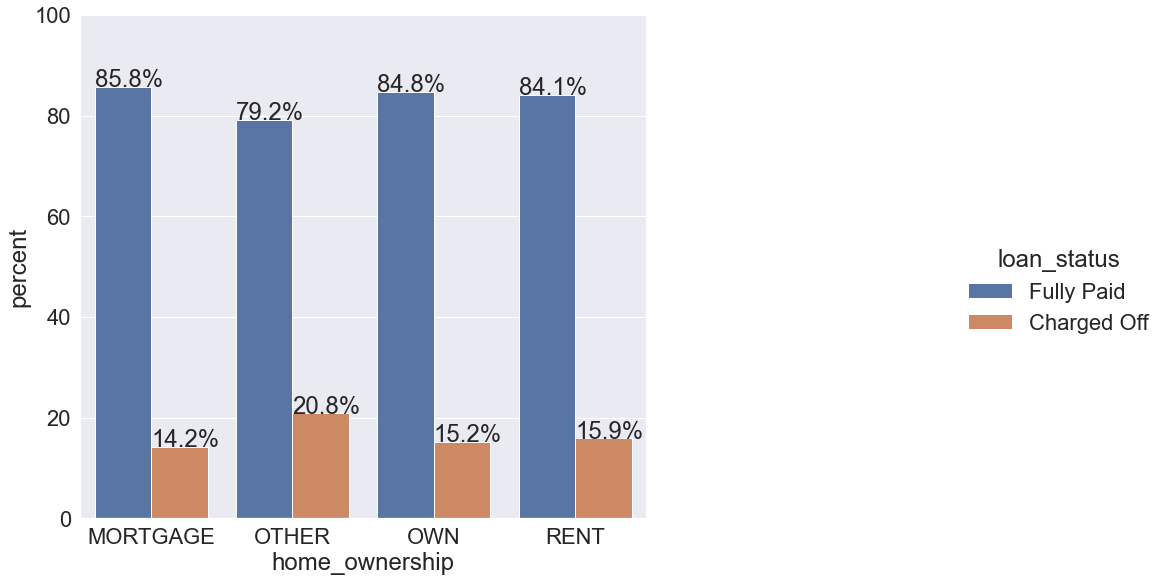

In [123]:
x,y='home_ownership', 'loan_status'
dfp=df1.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(20,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

Bar plot showing the percentage of Fully Paid and Charged Off loans in the context of mortage status.

## 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In case of annual_inc and loan_status the calculated p value is lower than 5% indicating that values from both columns are dependent. On bar graph the drop in percentage (from 17,6% to 11,7%) of charged off loans is visible while annual income increases.

In [124]:
len(df['annual_inc'].unique())

5167

In [125]:
k=[]
for i in list(df1['annual_inc']):
    if i <=50000:
        k.append(50000)
    if 50000<i<=100000:
        k.append(100000)
    if 100000<i:
        k.append(150000)
df1.insert(loc=2,column='inc_cat',value=k)

In [126]:
df1.groupby('inc_cat').loan_amnt.count()

inc_cat
50000     16971
100000    19438
150000     6126
Name: loan_amnt, dtype: int64

In [127]:
Chi2 (df1.loan_status, df1.inc_cat)

statistcs: 152.89818562594888  p value: 6.245038701361191e-33  degres of freedom: 3


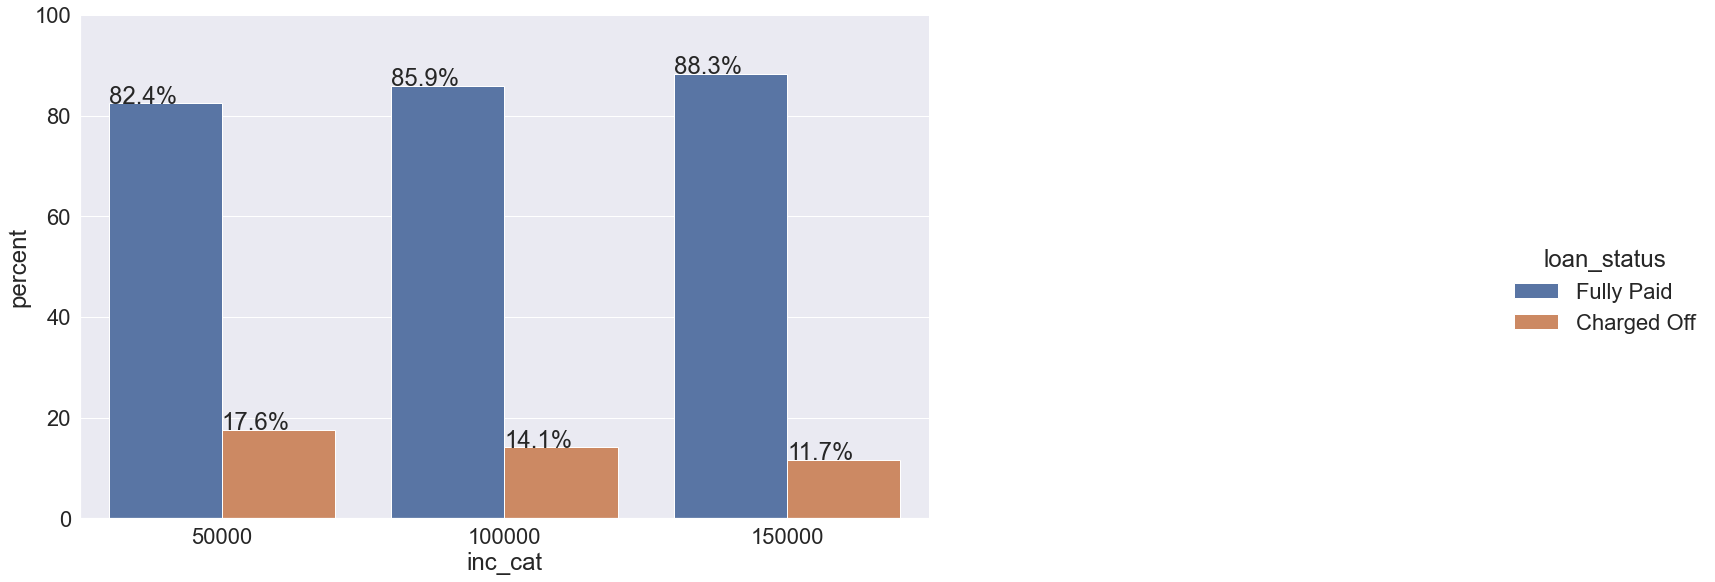

In [128]:
x,y='inc_cat', 'loan_status'
dfp=df1.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(30,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

Bar plot showing the percentage of Fully Paid and Charged Off loans in the context of annual income.

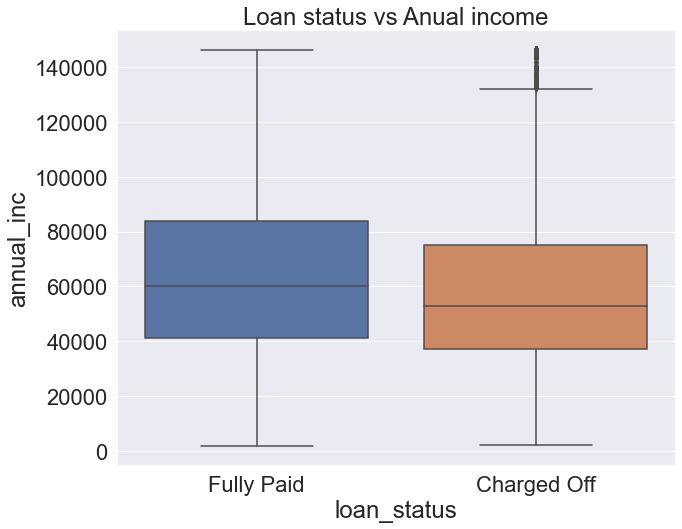

In [129]:
plt.figure(figsize=(10,8))
df1['annual_inc'] = df1['annual_inc'].astype('float')
sns.boxplot(data =df1, x='loan_status', y='annual_inc')
plt.title('Loan status vs Anual income')
plt.show()

## 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

When values from columns loan_status and emp_length were compared the p value from Chi Squared test is lower than 5% indicating alternative hypothesis (values are dependent) more probable. Looking at the bar graph the lowest percentage of charged off loans (less than 14%) is observed for employment length of 2 and 9 years, while the highest portion of unpaid loans - 16,7% of all loans is spoted for clients working for at least 10 years. However there is no visible tendency for paid/unpaid ratio in regard of work record.

In [130]:
Chi2 (df.loan_status, df.emp_length)

statistcs: 34.72034466878813  p value: 0.00027553341485475537  degres of freedom: 11


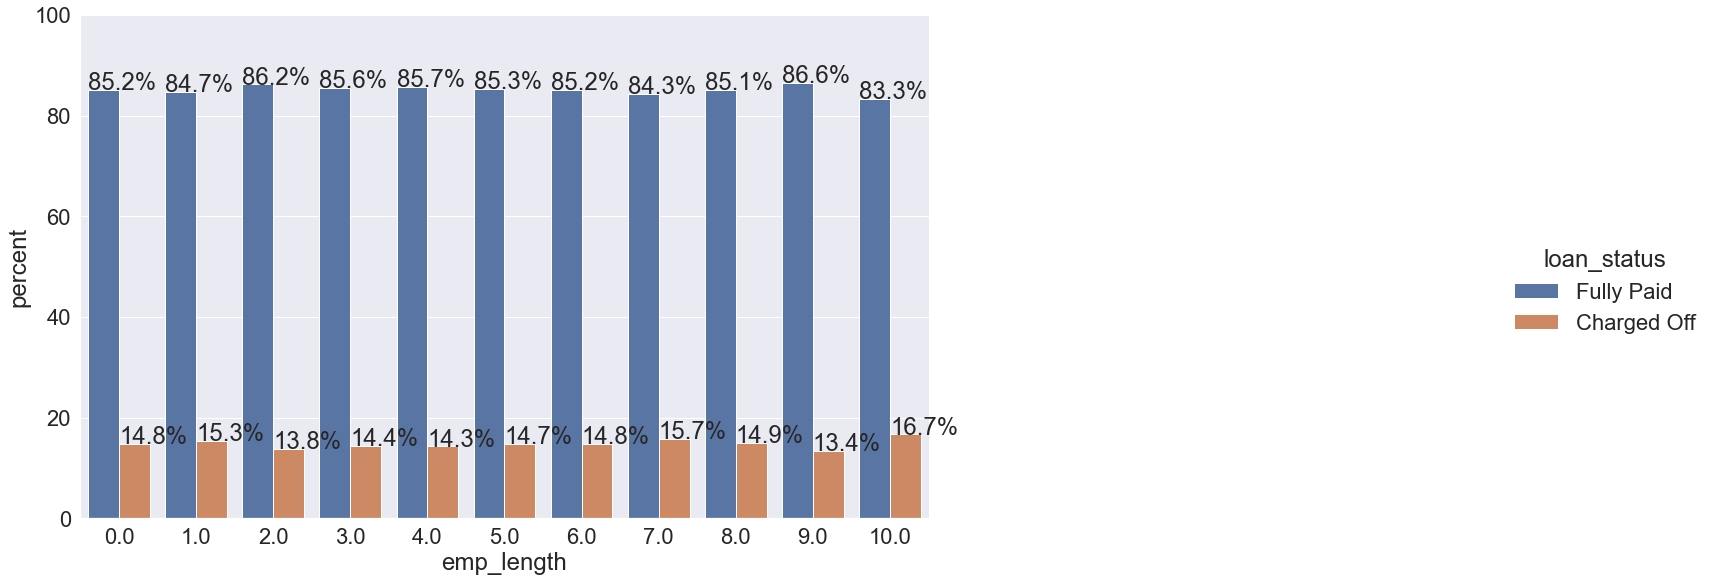

In [131]:
x,y='emp_length', 'loan_status'
dfp=df.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(30,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

Bar plot showing the percentage of Fully Paid and Charged Off loans in the context of work records.

## 6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

<AxesSubplot:>

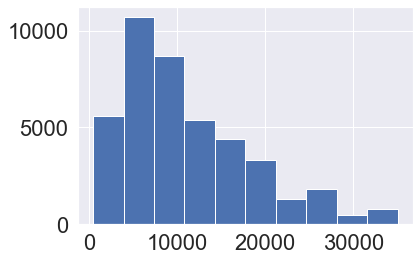

In [132]:
df.loan_amnt.hist()

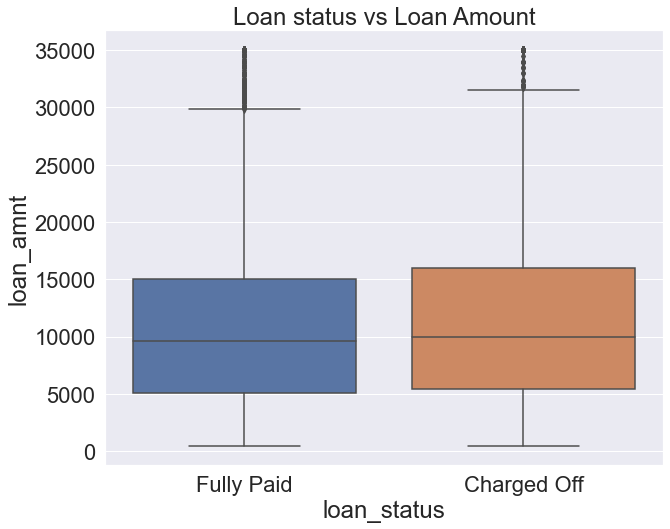

In [243]:
plt.figure(figsize=(10,8))
sns.boxplot(data =df1, x='loan_status', y='loan_amnt')
plt.title('Loan status vs Loan Amount')
plt.show()

In [133]:
m=[]
for i in list(df1['loan_amnt']):
    if i <=10000:
        m.append(10000)
    if 10000<i<=20000:
        m.append(20000)
    if 20000<i:
        m.append(30000)
df1.insert(loc=2,column='amnt_cat',value=m)

In [134]:
Chi2(df1.loan_status, df1.amnt_cat)

statistcs: 91.24229321630092  p value: 1.184976760327486e-19  degres of freedom: 3


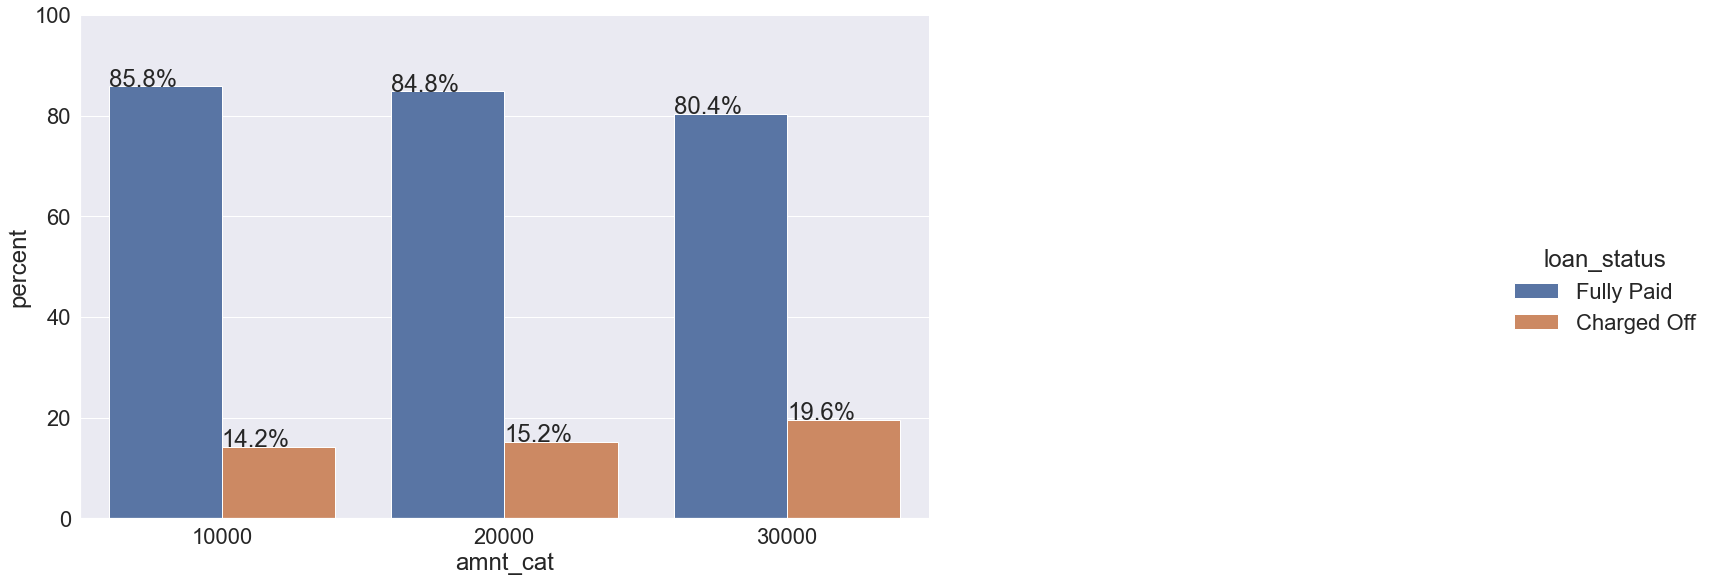

In [135]:
x,y='amnt_cat', 'loan_status'
dfp=df1.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(30,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

In [136]:
Chi2(df.loan_status,df.term)

statistcs: 759.7233544081822  p value: 1.06701298291546e-165  degres of freedom: 2


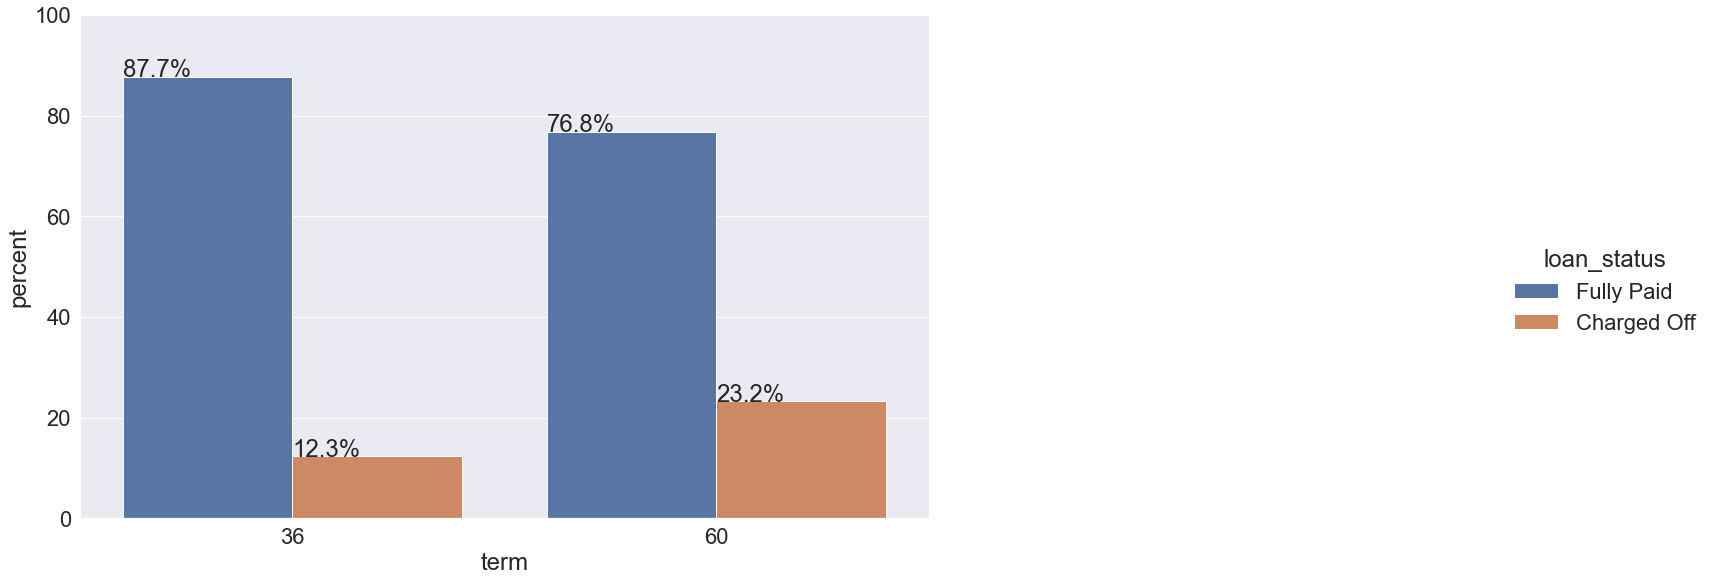

In [137]:
x,y='term', 'loan_status'
dfp=df.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(30,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

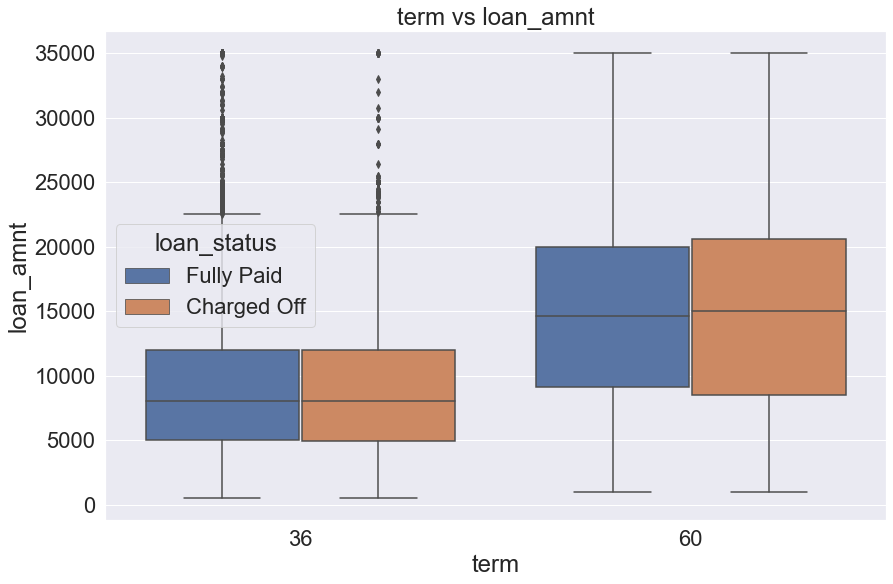

In [138]:
plt.figure(figsize=(14,9))
df['loan_amnt'] = df['loan_amnt'].astype('float')
sns.boxplot(data =df, x='term', y='loan_amnt', hue='loan_status')
plt.title('term vs loan_amnt')
plt.show()

In [139]:
Chi2(df.loan_status, df.purpose)

statistcs: 276.6417791544177  p value: 8.222914611292572e-57  degres of freedom: 6


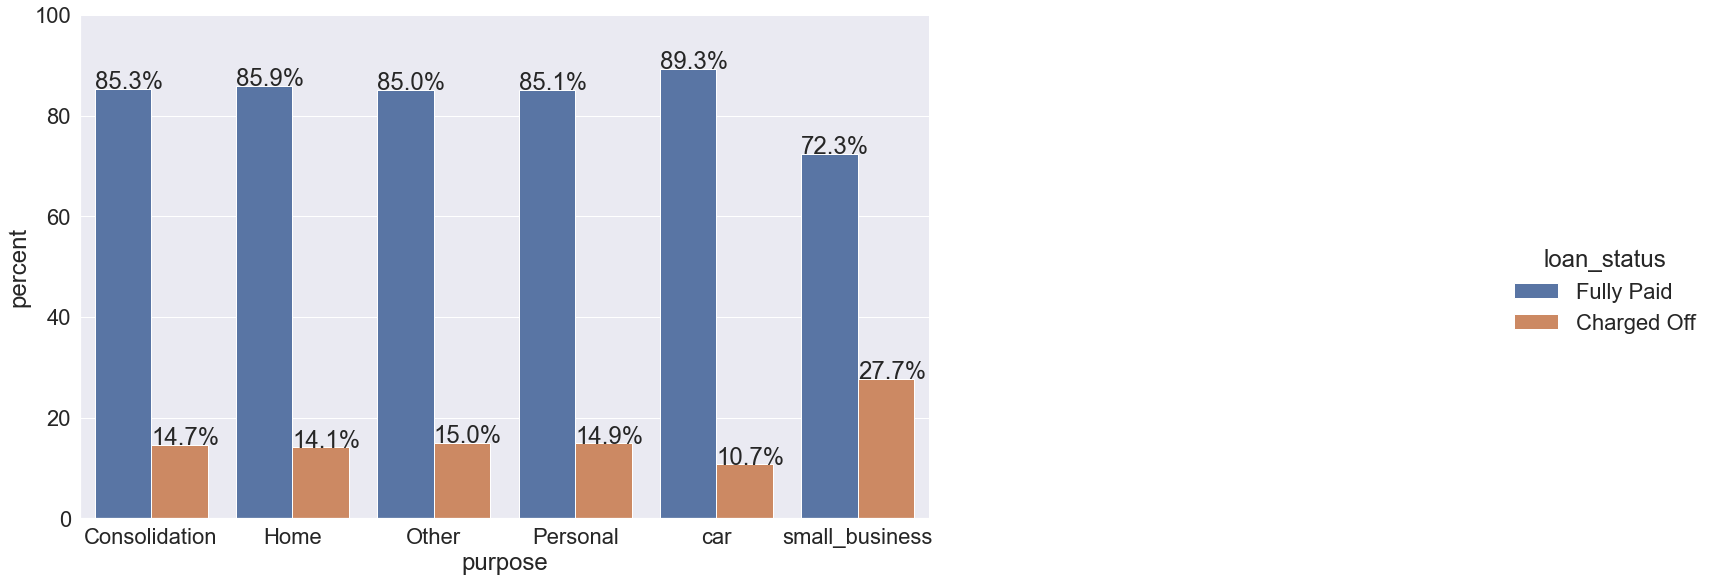

In [140]:
x,y='purpose', 'loan_status'
dfp=df1.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(30,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

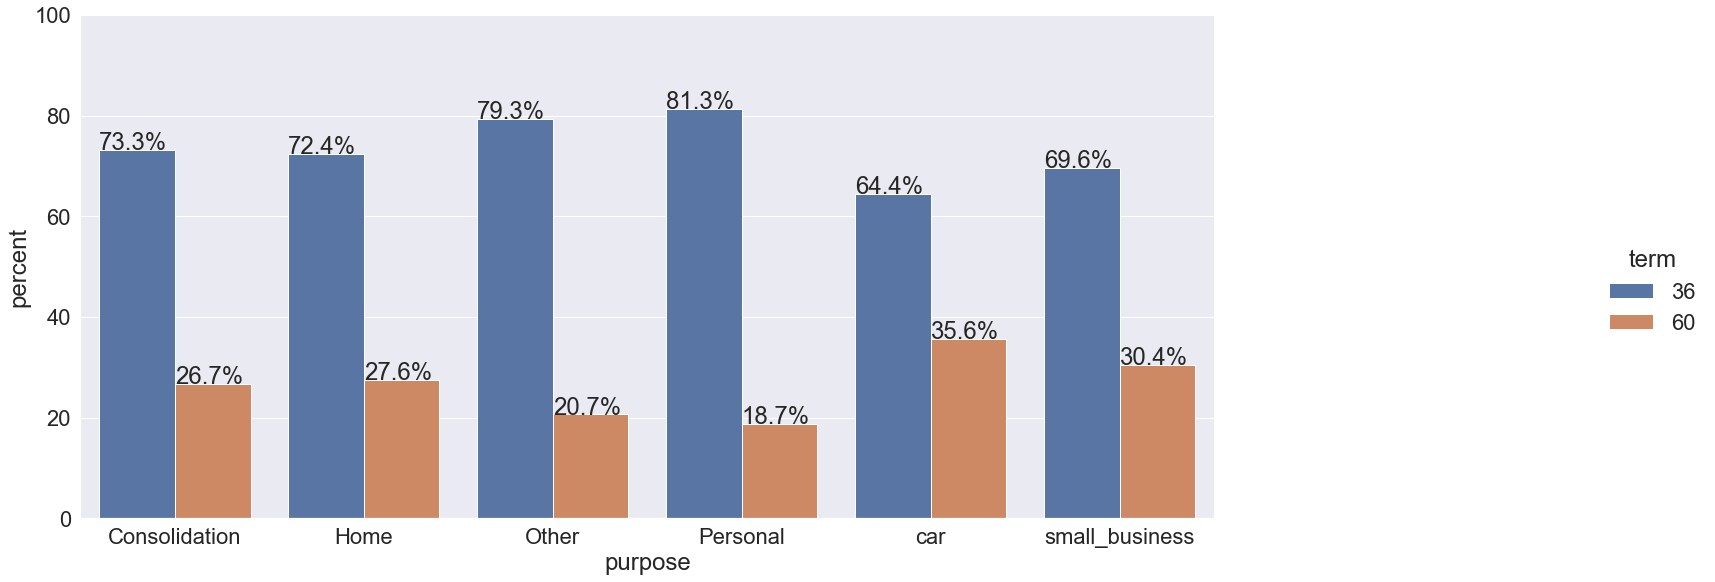

In [141]:
x,y='purpose', 'term'
dfp=df1.groupby(x)[y].value_counts(normalize=True)
dfp=dfp.mul(100)
dfp=dfp.rename('percent').reset_index()
g=sns.catplot(x=x, y='percent', hue=y, kind='bar', data=dfp)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(30,10)


for p in g.ax.patches:
    txt=str(p.get_height().round(1))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x, txt_y, txt)

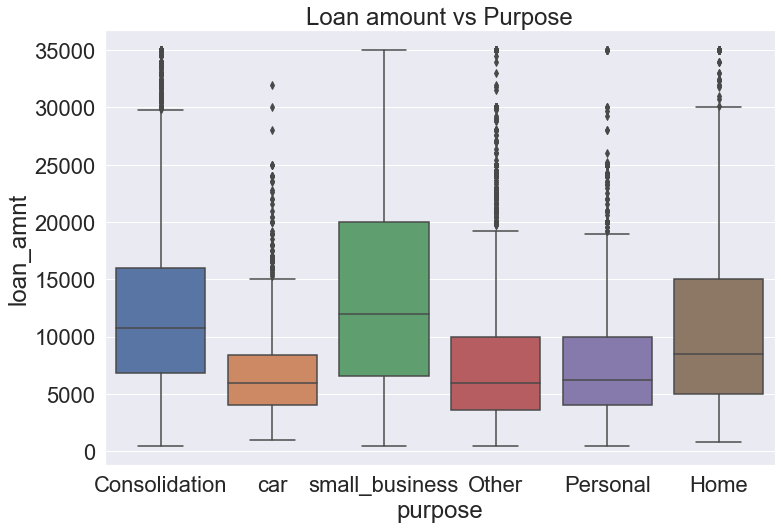

In [142]:
plt.figure(figsize=(12,8))
df1['loan_amnt'] = df1['loan_amnt'].astype('float')
sns.boxplot(data =df1, x='purpose', y='loan_amnt')
plt.title('Loan amount vs Purpose')
plt.show()

# 3. Feature engineering

# 4. Clasification models

## 1. Clustering

## 2. Comparision of Logistic Regression, Decison Tree, Random Forest, SVM, KNN

In [143]:
dff.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [220]:
# Podzial danych na treningowe i testowe
train, test = train_test_split(dff, test_size = 0.3)

In [221]:
predictors =['loan_amnt', 'term', 'int_rate', 'installment', 'purpose',
        'dti', 'revol_bal', 'fico_range_high',
       'revol_util', 'home_ownership', 'annual_inc','grade',
       'verification_status']
train_X = train[predictors]
train_y = train.loan_status

test_X = test[predictors]
test_y = test.loan_status

In [222]:
model = LogisticRegression(max_iter=400)
model.fit(train_X, train_y)

LogisticRegression(max_iter=400)

In [223]:
predictions = model.predict(test[predictors]) #model.predict_proba treshold prawdopodobieństwa
accuracy = metrics.accuracy_score(predictions, test['loan_status'])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 84.750%


In [224]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.60      0.00      0.01      1948
           1       0.85      1.00      0.92     10813

    accuracy                           0.85     12761
   macro avg       0.72      0.50      0.46     12761
weighted avg       0.81      0.85      0.78     12761



In [225]:
metrics.roc_auc_score(predictions, test['loan_status'])

0.7238491098737354

In [226]:
confusion_matrix(test['loan_status'], predictions)

array([[    6,  1942],
       [    4, 10809]], dtype=int64)

In [228]:
dtree = DecisionTreeClassifier()

In [229]:
dtree.fit(train_X,train_y)

DecisionTreeClassifier()

In [230]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [232]:
dt_prediction = dtree.predict(test_X)

In [234]:
print(classification_report(test_y,dt_prediction))

dtree_pr= evaluate(dt_prediction,test_y)
dtree_pr

              precision    recall  f1-score   support

           0       0.21      0.23      0.22      1948
           1       0.86      0.84      0.85     10813

    accuracy                           0.75     12761
   macro avg       0.53      0.54      0.53     12761
weighted avg       0.76      0.75      0.75     12761



{'f1-score': 0.85, 'accuracy': 0.75}

In [236]:
confusion_matrix(test['loan_status'], dt_prediction)

array([[ 452, 1496],
       [1739, 9074]], dtype=int64)

In [237]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_X,train_y)

RandomForestClassifier()

In [238]:
rf_prediction = rf.predict(test_X)

In [239]:
print(classification_report(test_y,rf_prediction))
rf_pr = evaluate(rf_prediction,test_y)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.30      0.02      0.03      1948
           1       0.85      0.99      0.92     10813

    accuracy                           0.84     12761
   macro avg       0.58      0.50      0.47     12761
weighted avg       0.77      0.84      0.78     12761

{'f1-score': 0.92, 'accuracy': 0.84}


In [240]:
confusion_matrix(test['loan_status'], rf_prediction)

array([[   33,  1915],
       [   76, 10737]], dtype=int64)

## 3. PCA - impact on results of clasification models 

In [246]:
X=dff.drop('loan_status', axis=1)
print('X shape:', X.shape)
y=dff['loan_status']
print('y shape:', y.shape)

X shape: (42535, 29)
y shape: (42535,)


In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [255]:
X_scaled

array([[-0.82173051, -0.81456887, -0.59064503, ..., -0.00487202,
        -0.2166725 , -0.00485477],
       [-1.15907367, -1.16437427,  1.69306429, ..., -0.00487202,
        -0.2166725 , -0.00485477],
       [-1.1725674 , -1.17836649, -0.59064503, ..., -0.00487202,
        -0.2166725 , -0.00485477],
       ...,
       [-1.15570024, -1.16087622, -0.59064503, ...,         nan,
                nan,         nan],
       [-0.61932461, -0.60468562, -0.59064503, ...,         nan,
                nan,         nan],
       [-0.82173051, -0.81456887, -0.59064503, ...,         nan,
                nan,         nan]])

In [254]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## 4. Generation of final model